In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)
# read data

# Business Understanding:
The lending industry faces significant challenges in assessing
creditworthiness, particularly for applicants with limited or no
credit history. Loan defaults pose financial risks to lending
institutions, making accurate risk assessment crucial.

In [2]:
loan_df = pd.read_csv("C:\\Users\\User\\Downloads\\application_data.csv")

In [3]:
# checking the dataset shape.
loan_df.shape

(307511, 122)

In [4]:
# checking the null values in the dataset

loan_df.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

# Dataset-Feature Understanding:

*SK_ID_CURR: The unique identifier for each record in the dataset.

*TARGET: The target variable indicating whether the customer had payment difficulties (1) or not (0)
.
*NAME_CONTRACT_TYPE: Type of loan taken by the customer (e.g., cash loans, revolving loans).

*CODE_GENDER: Gender of the customer (M: Male, F: Female).

*FLAG_OWN_CAR: Whether the customer owns a car (Y: Yes, N: No).

*FLAG_OWN_REALTY: Whether the customer owns real estate (Y: Yes, N: No).

*CNT_CHILDREN: Number of children the customer has.

*AMT_INCOME_TOTAL: Total income of the customer.

*AMT_CREDIT: Total amount of credit taken by the customer.

*AMT_ANNUITY: Annuity of the loan.

*AMT_GOODS_PRICE: Price of the goods for which the loan is given.

*NAME_TYPE_SUITE: Who was accompanying the customer when applying for the loan.

*NAME_INCOME_TYPE: Type of income of the customer (e.g., working, pensioner, business).

*NAME_EDUCATION_TYPE: Highest level of education of the customer.

*NAME_FAMILY_STATUS: Family status of the customer (e.g., single, married, widowed).

*NAME_HOUSING_TYPE: Housing situation of the customer (e.g., house/apartment, with parents).

*REGION_POPULATION_RELATIVE: Normalized population of the region where the customer lives.

*DAYS_BIRTH: Age of the customer in days at the time of application.

*DAYS_EMPLOYED: Number of days employed until the application.

*DAYS_REGISTRATION: Number of days before the application the customer's registration was changed.

*DAYS_ID_PUBLISH: Number of days before the application the customer's ID was published.

*FLAG_MOBIL: Whether the customer provided a mobile phone number.

*FLAG_EMP_PHONE: Whether the customer provided a work phone number.

*FLAG_WORK_PHONE: Whether the customer provided a mobile phone number.

*FLAG_CONT_MOBILE: Whether the mobile phone is reachable.

*FLAG_PHONE: Whether the customer provided a home phone number.

*FLAG_EMAIL: Whether the customer provided an email address.

*OCCUPATION_TYPE: Occupation of the customer.

*CNT_FAM_MEMBERS: Number of family members of the customer.

*REGION_RATING_CLIENT: Region rating of the client.

*REGION_RATING_CLIENT_W_CITY: Region rating of the client with taking city into account.

*WEEKDAY_APPR_PROCESS_START: Day of the week the application was started.

*HOUR_APPR_PROCESS_START: Time of the day the application was started.

*REG_REGION_NOT_LIVE_REGION: Flag indicating if client's permanent address does not match contact address (region).

*REG_REGION_NOT_WORK_REGION: Flag indicating if client's permanent address does not match contact address (region).

*LIVE_REGION_NOT_WORK_REGION: Flag indicating if client's contact address does not match work address (region).

*REG_CITY_NOT_LIVE_CITY: Flag indicating if client's permanent address does not match contact address (city).

*REG_CITY_NOT_WORK_CITY: Flag indicating if client's permanent address does not match work address (city).

*LIVE_CITY_NOT_WORK_CITY: Flag indicating if client's contact address does not match work address (city).

*ORGANIZATION_TYPE: Type of organization where the client works.

*EXT_SOURCE_2: External source providing information about the customer.

*EXT_SOURCE_3: External source providing information about the customer.

*OBS_30_CNT_SOCIAL_CIRCLE: Number of observations of clients social surroundings with observable 30 DPD (days past due) default.

*DEF_30_CNT_SOCIAL_CIRCLE: Number of observations of clients social surroundings defaulted on 30 DPD (days past due).

*OBS_60_CNT_SOCIAL_CIRCLE: Number of observations of clients social surroundings with observable 60 DPD (days past due) default.

*DEF_60_CNT_SOCIAL_CIRCLE: Number of observations of clients social surroundings defaulted on 60 DPD (days past due).

*DAYS_LAST_PHONE_CHANGE: Number of days since last client's phone change.

*FLAG_DOCUMENT_X: Flag indicating if the client provided a specific document.

*AMT_REQ_CREDIT_BUREAU_X: Number of enquiries to Credit Bureau about the client's credit.

In [5]:
# checking the null values in perctages.
missing_percentage = loan_df.isnull().mean() * 100
missing_percentage


SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [6]:
# Find columns with more than 50% missing values
columns_to_remove = missing_percentage[missing_percentage > 40].index

# Drop columns with more than 50% missing values
loan_df = loan_df.drop(columns=columns_to_remove, inplace=False)



In [7]:
loan_df.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

In [8]:
loan_df1 = loan_df.copy()

In [9]:
# handling null implies mean of dataset.

loan_df1['OCCUPATION_TYPE'] = loan_df1['OCCUPATION_TYPE'].fillna('Unknown')
loan_df1['AMT_ANNUITY'] = loan_df1['AMT_ANNUITY'].fillna(loan_df1['AMT_ANNUITY']).mean()
loan_df1['AMT_GOODS_PRICE'] = loan_df1['AMT_GOODS_PRICE'].fillna(loan_df1['AMT_GOODS_PRICE']).mean()
loan_df1['CNT_FAM_MEMBERS'] = loan_df1['CNT_FAM_MEMBERS'].fillna(loan_df1['CNT_FAM_MEMBERS']).mean()
loan_df1['EXT_SOURCE_2'] = loan_df1['EXT_SOURCE_2'].fillna(loan_df1['EXT_SOURCE_2']).mean()
loan_df1['EXT_SOURCE_3'] = loan_df1['EXT_SOURCE_3'].fillna(loan_df1['EXT_SOURCE_3']).mean()
loan_df1['OBS_30_CNT_SOCIAL_CIRCLE'] = loan_df1['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(loan_df1['OBS_30_CNT_SOCIAL_CIRCLE']).mean()
#loan_df1['OBS_60_CNT_SOCIAL_CIRCLE'] = loan_df1['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(loan_df1['OBS_60_CNT_SOCIAL_CIRCLE']).mean()
loan_df1['DEF_30_CNT_SOCIAL_CIRCLE'] = loan_df1['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(loan_df1['DEF_30_CNT_SOCIAL_CIRCLE']).mean()
loan_df1['OBS_60_CNT_SOCIAL_CIRCLE'] = loan_df1['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(loan_df1['OBS_60_CNT_SOCIAL_CIRCLE']).mean()
loan_df1['DEF_60_CNT_SOCIAL_CIRCLE'] = loan_df1['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(loan_df1['DEF_60_CNT_SOCIAL_CIRCLE']).mean()
loan_df1['DAYS_LAST_PHONE_CHANGE'] = loan_df1['DAYS_LAST_PHONE_CHANGE'].fillna(loan_df1['DAYS_LAST_PHONE_CHANGE']).mean()
# handling null implies mode of dataset.
loan_df1['NAME_TYPE_SUITE'] = loan_df1['NAME_TYPE_SUITE'].fillna(loan_df1['NAME_TYPE_SUITE'].mode()[0])

In [10]:
loan_df1.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
NAME_TYPE_SUITE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

In [11]:
loan_df1

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,27108.573909,538396.207429,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,2.152665,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.514393,0.510853,1.422245,0.143421,1.405292,0.100049,-962.858788,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,27108.573909,538396.207429,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.152665,1,1,MONDAY,11,0,0,0,0,0,0,School,0.514393,0.510853,1.422245,0.143421,1.405292,0.100049,-962.858788,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,27108.573909,538396.207429,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,2.152665,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.514393,0.510853,1.422245,0.143421,1.405292,0.100049,-962.858788,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,27108.573909,538396.207429,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.152665,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.514393,0.510853,1.422245,0.143421,1.405292,0.100049,-962.858788,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,27108.573909,538396.207429,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,2.152665,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.514393,0.510853,1.422245,0.143421,1.405292,0.100049,-962.858788,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27108.573909,538396.207429,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,1,1,0,1,0,0,Sales staff,2.152665,1,1,THURSDAY,15,0,0,0,0,0,0,Services,0.514393,0.510853,1.422245,0.143421,1.405292,0.100049,-962.858788,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [12]:

columns_to_convert = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']

# Convert negative values to positive
loan_df1[columns_to_convert] = loan_df1[columns_to_convert].abs()

loan_df1

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,27108.573909,538396.207429,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,2.152665,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.514393,0.510853,1.422245,0.143421,1.405292,0.100049,962.858788,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,27108.573909,538396.207429,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.152665,1,1,MONDAY,11,0,0,0,0,0,0,School,0.514393,0.510853,1.422245,0.143421,1.405292,0.100049,962.858788,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,27108.573909,538396.207429,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,2.152665,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.514393,0.510853,1.422245,0.143421,1.405292,0.100049,962.858788,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,27108.573909,538396.207429,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.152665,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.514393,0.510853,1.422245,0.143421,1.405292,0.100049,962.858788,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,27108.573909,538396.207429,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,2.152665,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.514393,0.510853,1.422245,0.143421,1.405292,0.100049,962.858788,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27108.573909,538396.207429,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,9327,236,8456.0,1982,1,1,0,1,0,0,Sales staff,2.152665,1,1,THURSDAY,15,0,0,0,0,0,0,Services,0.514393,0.510853,1.422245,0.143421,1.405292,0.100049,962.858788,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507

In [13]:
# Flag indicating if a client has a mobile phone (1) or not (0).
loan_df1['FLAG_MOBIL'].value_counts()

FLAG_MOBIL
1    307510
0         1
Name: count, dtype: int64

In [14]:
loan_df1['FLAG_CONT_MOBILE'].value_counts()

FLAG_CONT_MOBILE
1    306937
0       574
Name: count, dtype: int64

In [15]:
loan_df1['FLAG_PHONE'].value_counts()

FLAG_PHONE
0    221080
1     86431
Name: count, dtype: int64

In [16]:
loan_df1['FLAG_EMAIL'].value_counts()

FLAG_EMAIL
0    290069
1     17442
Name: count, dtype: int64

In [17]:
loan_df1['FLAG_DOCUMENT_2'].value_counts()

FLAG_DOCUMENT_2
0    307498
1        13
Name: count, dtype: int64

In [18]:
loan_df1['FLAG_DOCUMENT_3'].value_counts()

FLAG_DOCUMENT_3
1    218340
0     89171
Name: count, dtype: int64

In [19]:
#Number of enquiries to Credit Bureau about the client one year before application.
loan_df1['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts()

AMT_REQ_CREDIT_BUREAU_YEAR
0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
25.0        1
23.0        1
22.0        1
21.0        1
20.0        1
Name: count, dtype: int64

In [20]:
 #Number of enquiries to Credit Bureau about the client one quarter before application.
loan_df1['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts()

AMT_REQ_CREDIT_BUREAU_QRT
0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
8.0           7
7.0           7
261.0         1
19.0          1
Name: count, dtype: int64

In [21]:
# Number of enquiries to Credit Bureau about the client one month before application.
loan_df1['AMT_REQ_CREDIT_BUREAU_MON'].value_counts()

AMT_REQ_CREDIT_BUREAU_MON
0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
23.0         1
27.0         1
22.0         1
Name: count, dtype: int64

In [22]:
# Number of enquiries to Credit Bureau about the client one week before application.
loan_df1['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts()


AMT_REQ_CREDIT_BUREAU_WEEK
0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: count, dtype: int64

In [23]:
#Number of enquiries to Credit Bureau about the client one day before application.
loan_df1['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts()

AMT_REQ_CREDIT_BUREAU_DAY
0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: count, dtype: int64

In [24]:
# Number of enquiries to Credit Bureau about the client one hour before application.
loan_df1['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts()

AMT_REQ_CREDIT_BUREAU_HOUR
0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: count, dtype: int64

In [25]:
#Number of observations of client's social surroundings with observable 30 DPD (days past due) default.
loan_df1['OBS_30_CNT_SOCIAL_CIRCLE'].value_counts()

OBS_30_CNT_SOCIAL_CIRCLE
1.422245    307511
Name: count, dtype: int64

In [26]:
# Number of observations of client's social surroundings with observable 60 DPD (days past due) default.
loan_df1['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts()

OBS_60_CNT_SOCIAL_CIRCLE
1.405292    307511
Name: count, dtype: int64

In [27]:
# Number of observations of client's social surroundings with 30 DPD (days past due) default.
loan_df1['DEF_30_CNT_SOCIAL_CIRCLE'].value_counts()


DEF_30_CNT_SOCIAL_CIRCLE
0.143421    307511
Name: count, dtype: int64

In [28]:
#Number of observations of client's social surroundings with 60 DPD (days past due) default..
loan_df1['DEF_60_CNT_SOCIAL_CIRCLE'].value_counts()


DEF_60_CNT_SOCIAL_CIRCLE
0.100049    307511
Name: count, dtype: int64

In [29]:
#Flag indicating if client's permanent address does not match contact address (1) or not (0).
loan_df1['REG_REGION_NOT_LIVE_REGION'].value_counts()


REG_REGION_NOT_LIVE_REGION
0    302854
1      4657
Name: count, dtype: int64

In [30]:
#Flag indicating if client's permanent address does not match contact address (1) or not (0).
loan_df1['REG_REGION_NOT_LIVE_REGION'].value_counts()


REG_REGION_NOT_LIVE_REGION
0    302854
1      4657
Name: count, dtype: int64

In [31]:
#REG_REGION_NOT_WORK_REGION: Flag indicating if client's work address does not match contact address (1) or not (0).
loan_df1['REG_REGION_NOT_WORK_REGION'].value_counts()

REG_REGION_NOT_WORK_REGION
0    291899
1     15612
Name: count, dtype: int64

In [32]:
#LIVE_REGION_NOT_WORK_REGION: Flag indicating if client's living region does not match work region (1) or not (0).
loan_df1['LIVE_REGION_NOT_WORK_REGION'].value_counts()

LIVE_REGION_NOT_WORK_REGION
0    295008
1     12503
Name: count, dtype: int64

In [33]:
#REG_CITY_NOT_LIVE_CITY: Flag indicating if client's permanent address does not match contact address (city) (1) or not (0)
loan_df1['REG_CITY_NOT_LIVE_CITY'].value_counts()

REG_CITY_NOT_LIVE_CITY
0    283472
1     24039
Name: count, dtype: int64

In [34]:
#REG_CITY_NOT_WORK_CITY: Flag indicating if client's work address does not match contact address (city) (1) or not (0).
loan_df1['REG_CITY_NOT_WORK_CITY'].value_counts()

REG_CITY_NOT_WORK_CITY
0    236644
1     70867
Name: count, dtype: int64

In [35]:
#LIVE_CITY_NOT_WORK_CITY: Flag indicating if client's living city does not match work city (1) or not (0).
loan_df1['LIVE_CITY_NOT_WORK_CITY'].value_counts()



LIVE_CITY_NOT_WORK_CITY
0    252296
1     55215
Name: count, dtype: int64

In [36]:
#Our rating of the region where the client lives (from 1 to 3).
loan_df1['REGION_RATING_CLIENT'].value_counts()


REGION_RATING_CLIENT
2    226984
3     48330
1     32197
Name: count, dtype: int64

In [37]:
#REGION_RATING_CLIENT_W_CITY: Our rating of the region where the client lives with taking city into account (from 1 to 3).
loan_df1['REGION_RATING_CLIENT_W_CITY'].value_counts()

REGION_RATING_CLIENT_W_CITY
2    229484
3     43860
1     34167
Name: count, dtype: int64

In [38]:
loan_df1.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR'],axis = 1,inplace = True)

In [39]:
numerical_features1 = [feature for feature in loan_df1.columns if loan_df1[feature].dtype != "O"]

categorical_features1 = [feature for feature in loan_df1.columns if loan_df1[feature].dtype == "O"]


In [40]:
numerical_features1

['TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT

# EDA Part:
    
1.univariate analysis:
    

In [41]:
def plot(loan_df1,column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=loan_df1, x=column)
    plt.title(f'Box Plot for {column}')
    
    plt.subplot(1,3,2)
    sns.histplot(data=loan_df1, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')
    
    

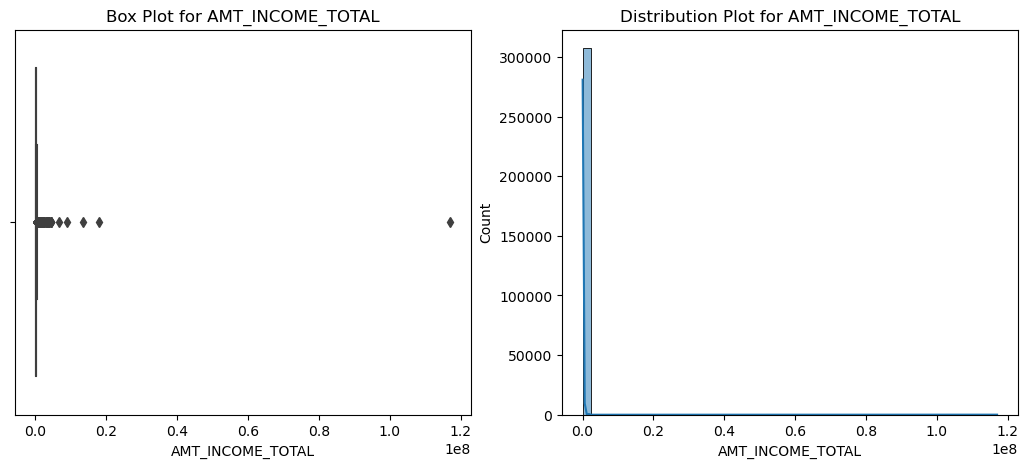

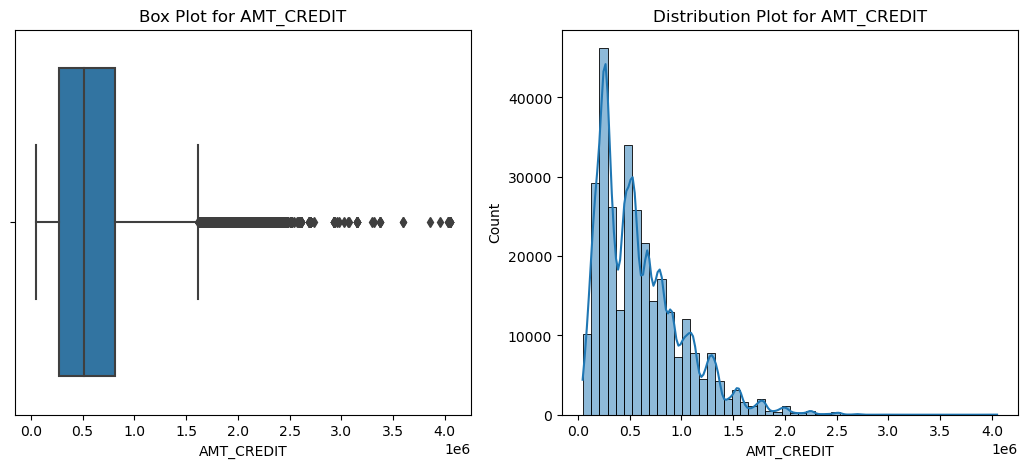

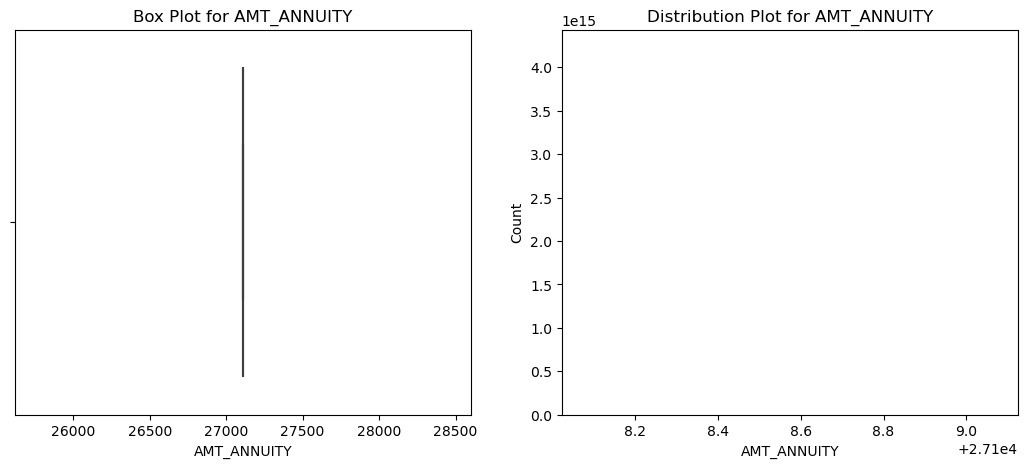

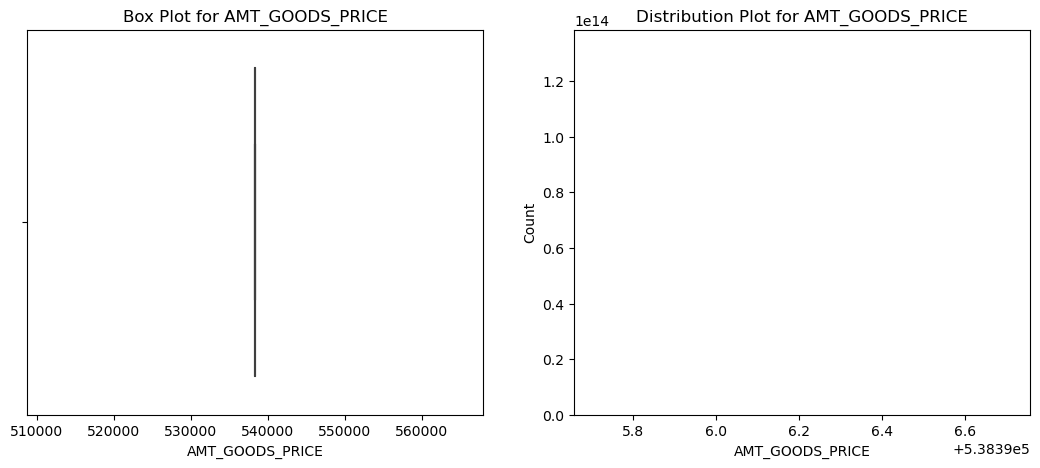

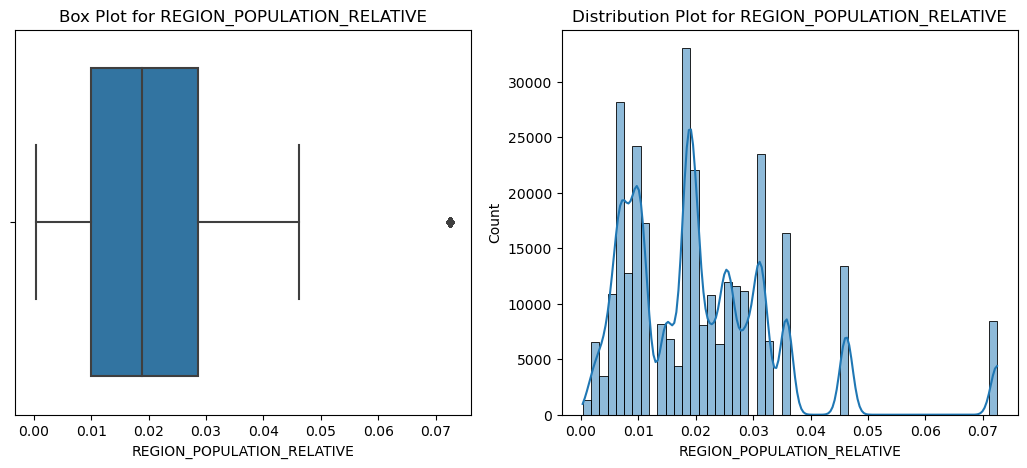

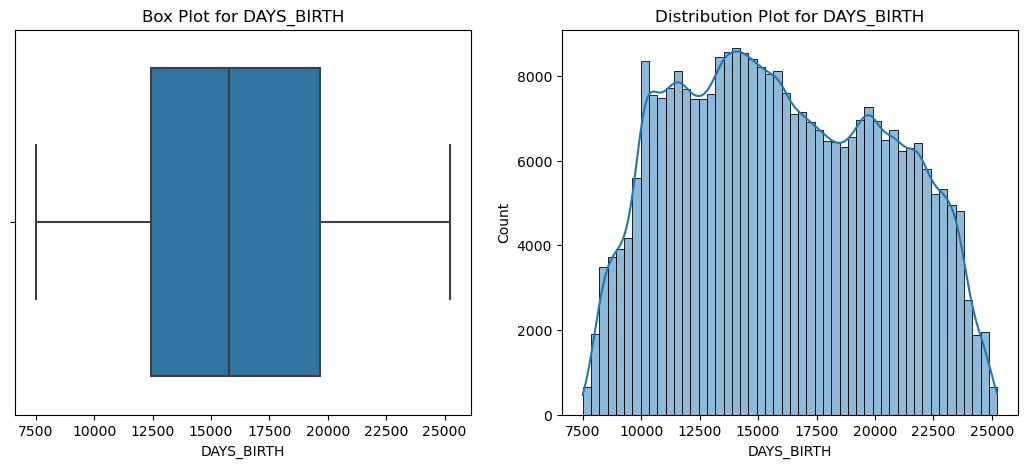

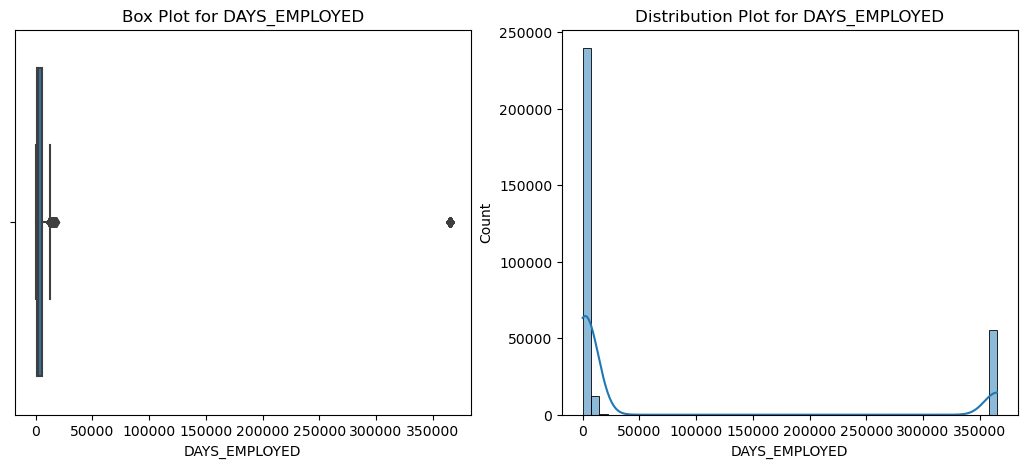

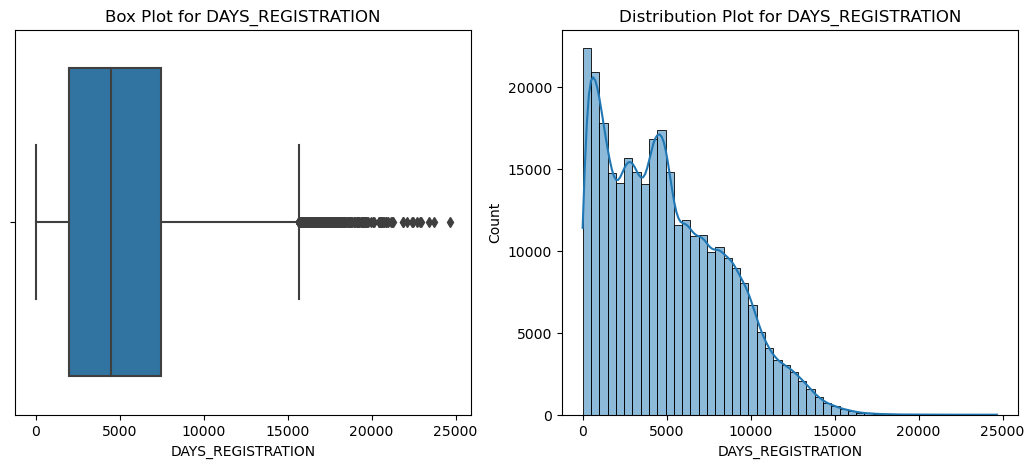

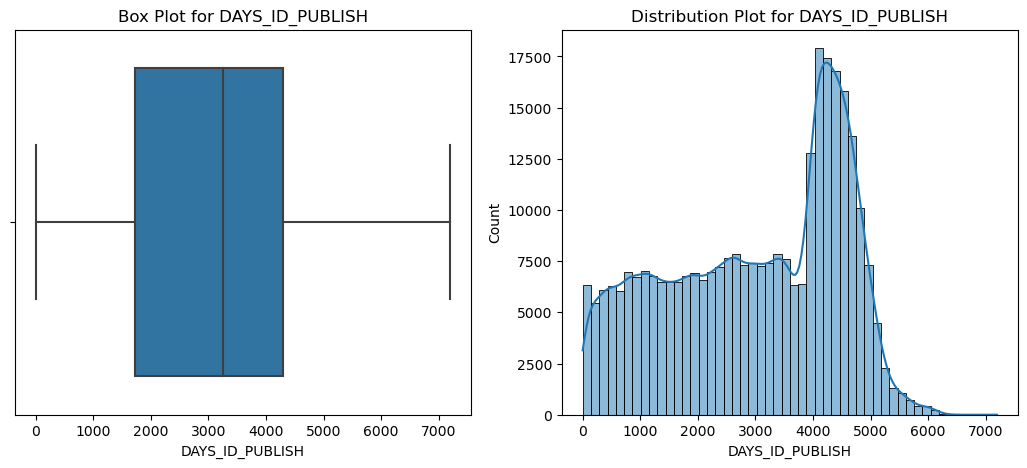

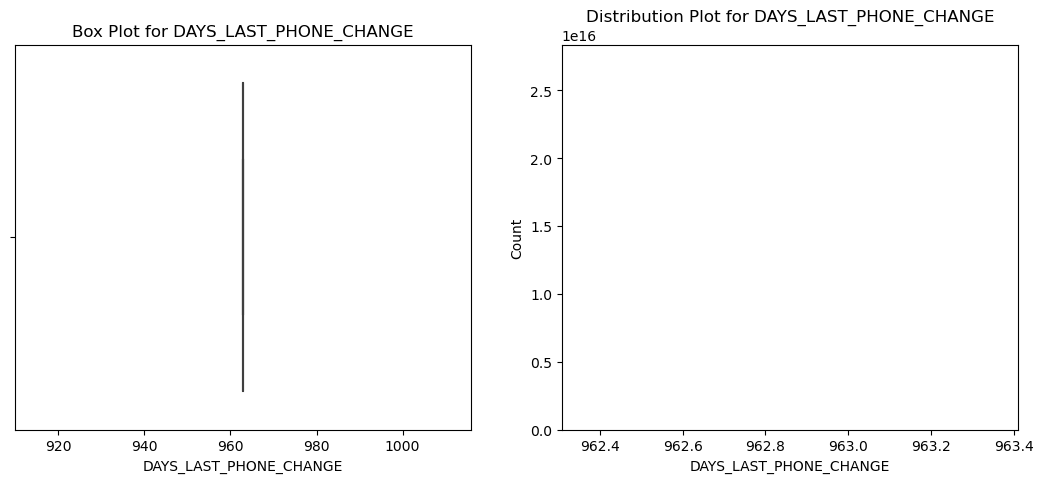

In [42]:
for i in ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']:
    plot(loan_df1,i)

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='TARGET', ylabel='count'>

Text(0.5, 1.0, 'Loan Default')

Text(0, 0.5, 'Count')

Text(0.5, 0, 'TARGET')

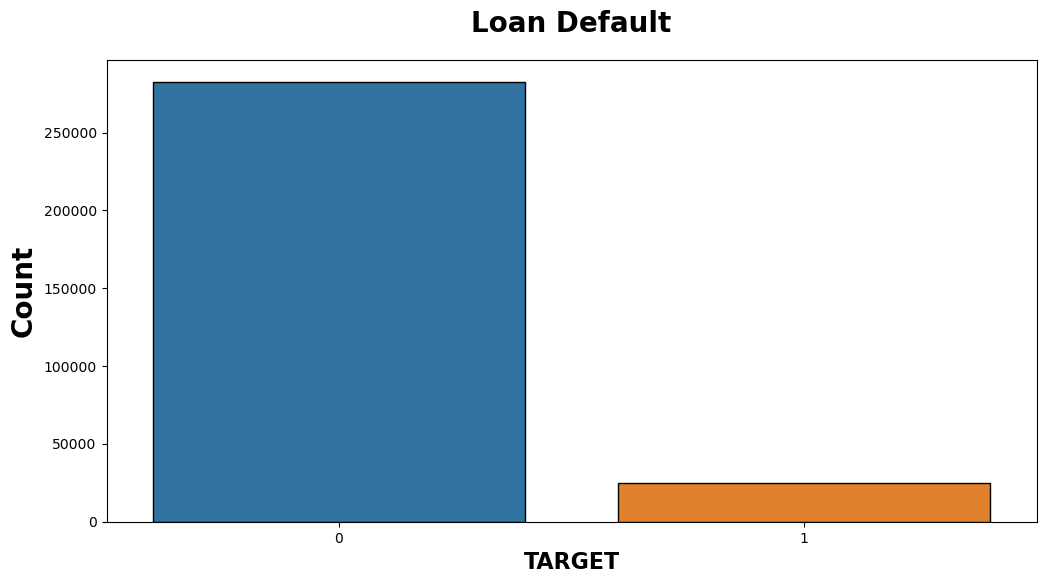

In [43]:

# Set the figure size
plt.figure(figsize=(12, 6))
# Create a countplot for 'TARGET'
sns.countplot(x="TARGET", data=loan_df1, ec="black")
# Set plot title and labels
plt.title("Loan Default", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("TARGET", weight="bold", fontsize=16)

# Show the plot
plt.show()


<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='NAME_CONTRACT_TYPE', ylabel='count'>

Text(0.5, 1.0, 'Loan_Contract_Type')

Text(0, 0.5, 'Count')

Text(0.5, 0, 'NAME_CONTRACT_TYPE')

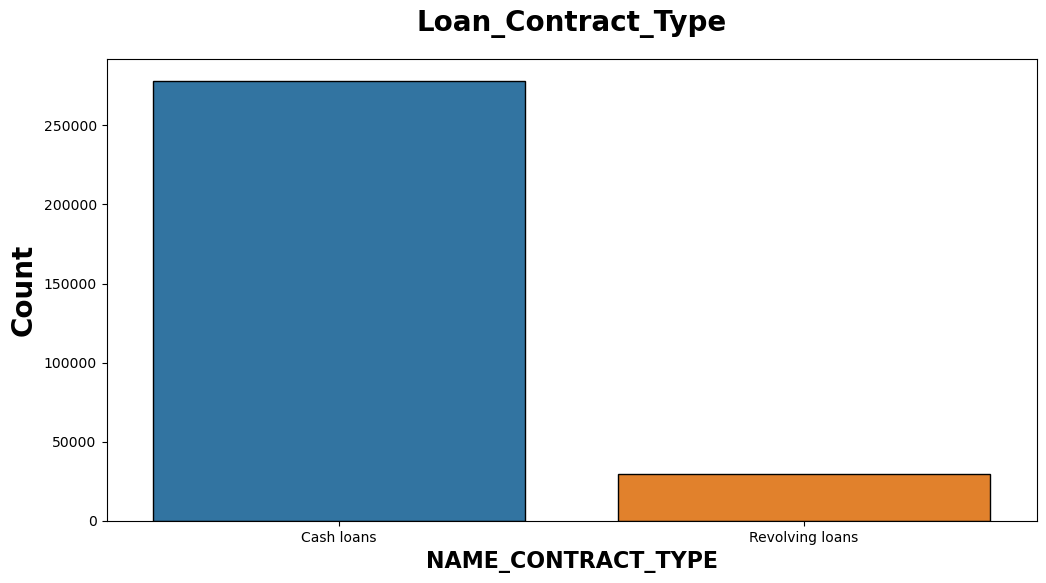

In [44]:
plt.figure(figsize=(12, 6))
sns.countplot(x="NAME_CONTRACT_TYPE", data=loan_df1, ec="black")
plt.title("Loan_Contract_Type", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("NAME_CONTRACT_TYPE", weight="bold", fontsize=16)
plt.show()

In [45]:
categorical_features1

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'ORGANIZATION_TYPE']

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='CODE_GENDER', ylabel='count'>

Text(0.5, 1.0, 'Geneder_infrences')

Text(0, 0.5, 'Count')

Text(0.5, 0, 'CODE_GENDER')

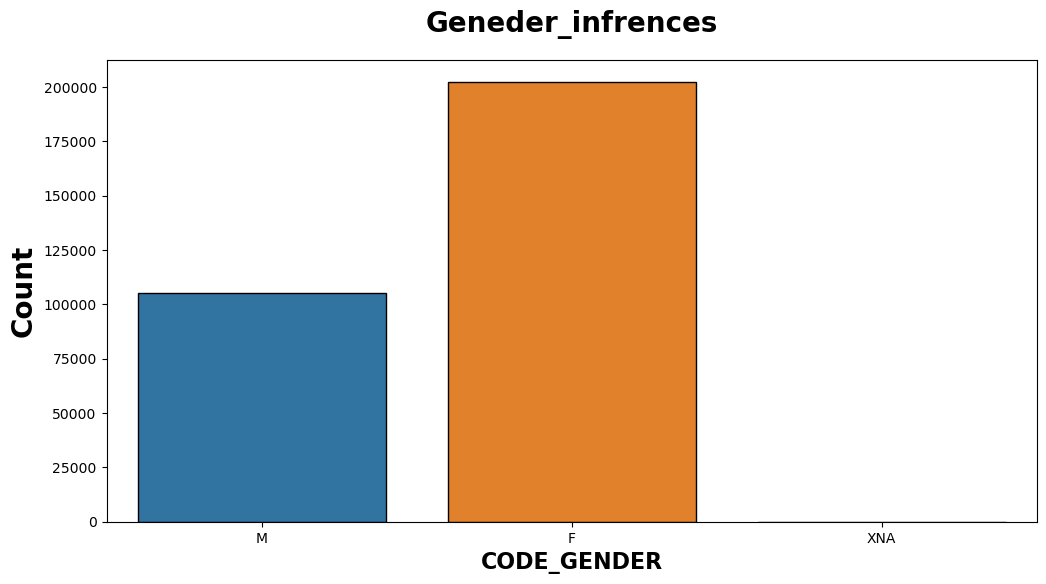

In [46]:
plt.figure(figsize=(12, 6))
sns.countplot(x="CODE_GENDER", data=loan_df1, ec="black")
plt.title("Geneder_infrences", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("CODE_GENDER", weight="bold", fontsize=16)
plt.show()

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='FLAG_OWN_CAR', ylabel='count'>

Text(0.5, 1.0, 'client_car_details')

Text(0, 0.5, 'Count')

Text(0.5, 0, 'FLAG_OWN_CAR')

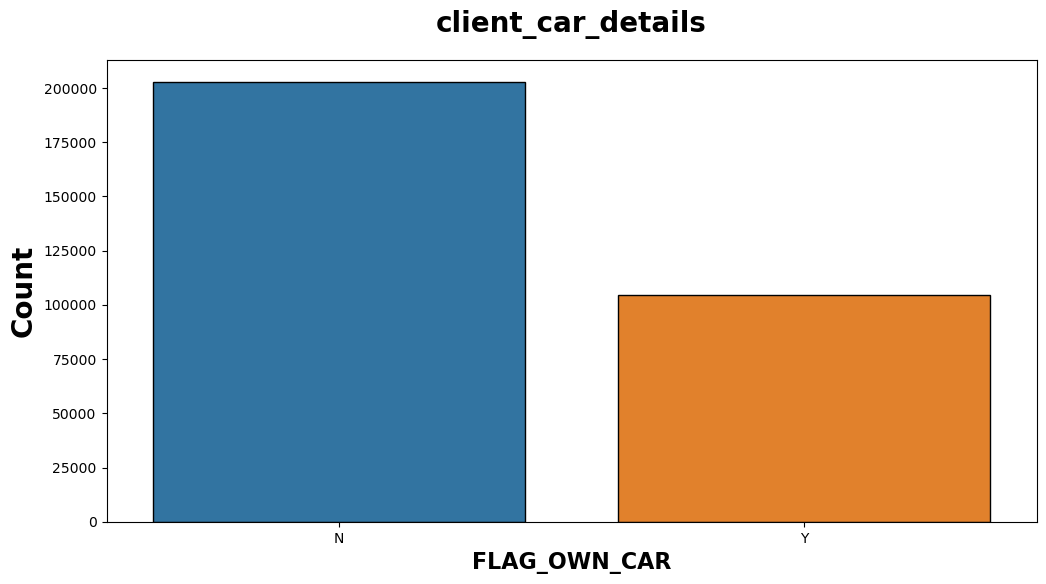

In [47]:
plt.figure(figsize=(12, 6))
sns.countplot(x="FLAG_OWN_CAR", data=loan_df1, ec="black")
plt.title("client_car_details", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("FLAG_OWN_CAR", weight="bold", fontsize=16)
plt.show()

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='FLAG_OWN_REALTY', ylabel='count'>

Text(0.5, 1.0, 'client_House_details')

Text(0, 0.5, 'Count')

Text(0.5, 0, 'FLAG_OWN_REALTY')

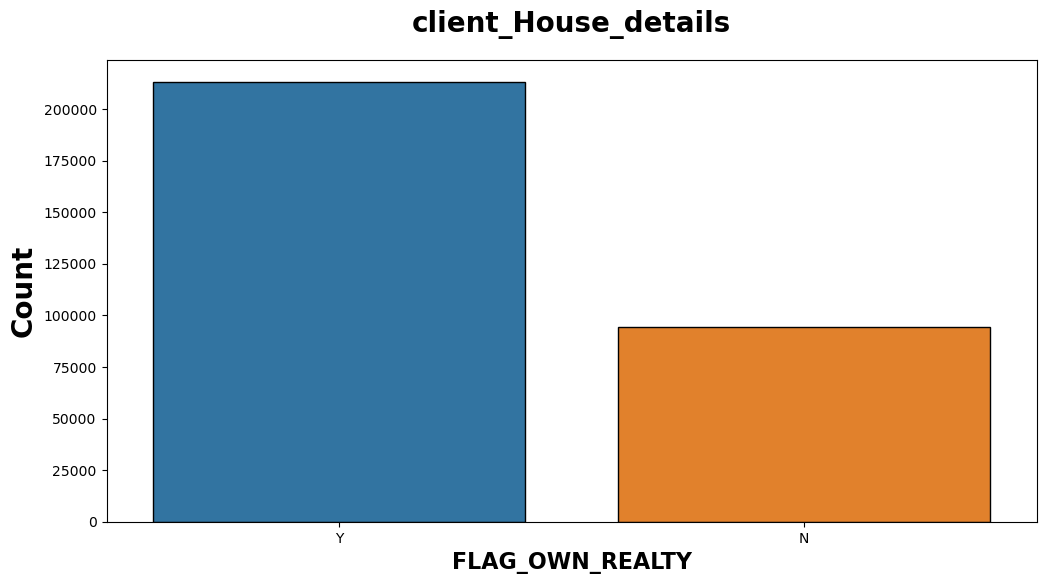

In [48]:
plt.figure(figsize=(12, 6))
sns.countplot(x="FLAG_OWN_REALTY", data=loan_df1, ec="black")
plt.title("client_House_details", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("FLAG_OWN_REALTY", weight="bold", fontsize=16)
plt.show()

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='NAME_TYPE_SUITE', ylabel='count'>

Text(0.5, 1.0, 'client_family_details')

Text(0, 0.5, 'Count')

Text(0.5, 0, 'NAME_TYPE_SUITE')

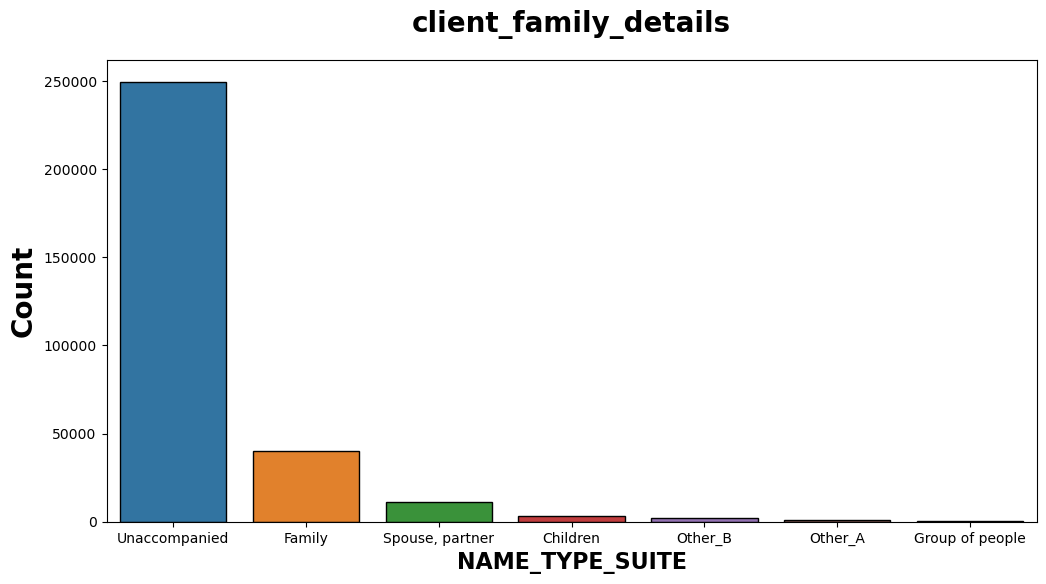

In [49]:
plt.figure(figsize=(12, 6))
sns.countplot(x="NAME_TYPE_SUITE", data=loan_df1, ec="black",order = loan_df1['NAME_TYPE_SUITE'].value_counts().index)
plt.title("client_family_details", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("NAME_TYPE_SUITE", weight="bold", fontsize=16)
plt.show()

<Figure size 1400x600 with 0 Axes>

<Axes: xlabel='NAME_INCOME_TYPE', ylabel='count'>

Text(0.5, 1.0, 'client_income_details')

Text(0, 0.5, 'Count')

Text(0.5, 0, 'NAME_INCOME_TYPE')

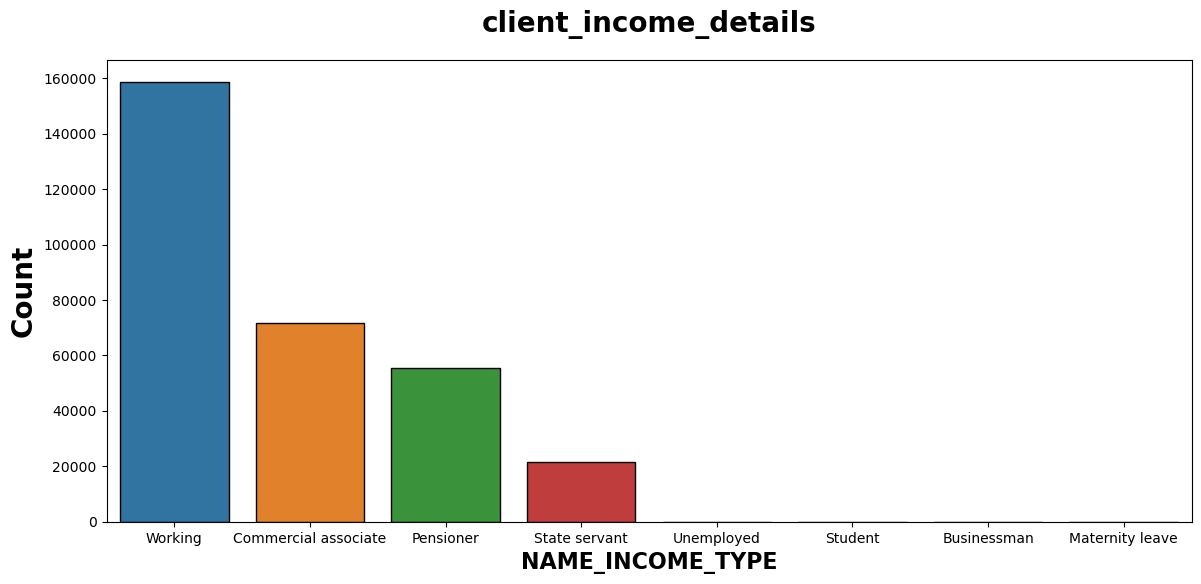

In [50]:
plt.figure(figsize=(14, 6))
sns.countplot(x="NAME_INCOME_TYPE", data=loan_df1, ec="black",order = loan_df1['NAME_INCOME_TYPE'].value_counts().index)
plt.title("client_income_details", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("NAME_INCOME_TYPE", weight="bold", fontsize=16)
plt.show()

<Figure size 1400x600 with 0 Axes>

<Axes: xlabel='NAME_EDUCATION_TYPE', ylabel='count'>

Text(0.5, 1.0, 'client_Education_details')

Text(0, 0.5, 'Count')

Text(0.5, 0, 'NAME_EDUCATION_TYPE')

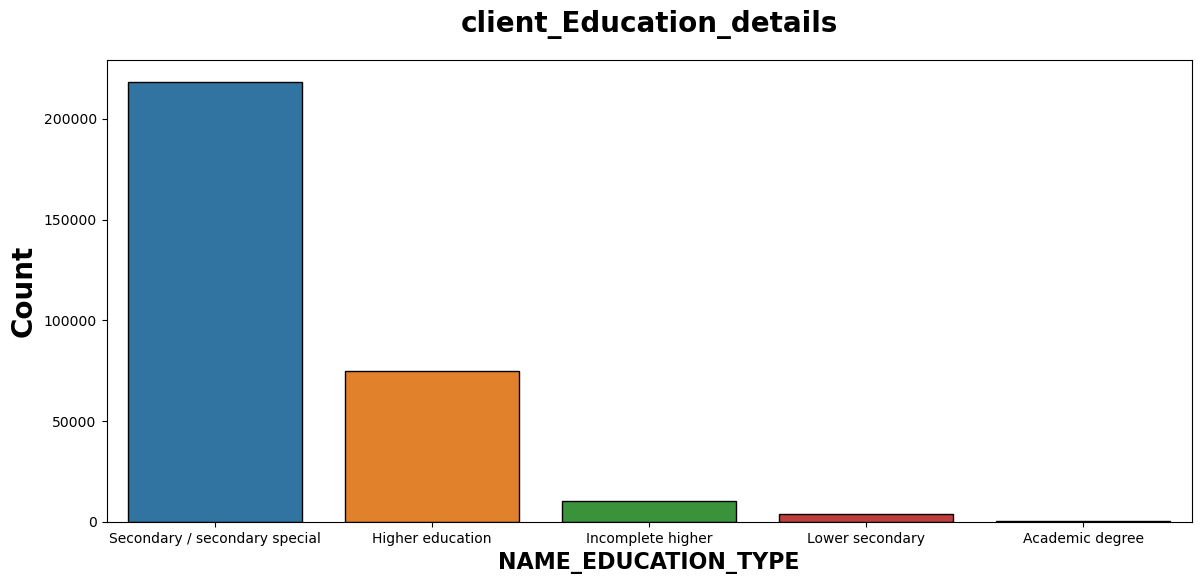

In [51]:
plt.figure(figsize=(14, 6))
sns.countplot(x="NAME_EDUCATION_TYPE", data=loan_df1, ec="black",order = loan_df1['NAME_EDUCATION_TYPE'].value_counts().index)
plt.title("client_Education_details", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("NAME_EDUCATION_TYPE", weight="bold", fontsize=16)
plt.show()

<Figure size 1400x600 with 0 Axes>

<Axes: xlabel='NAME_FAMILY_STATUS', ylabel='count'>

Text(0.5, 1.0, 'client_details')

Text(0, 0.5, 'Count')

Text(0.5, 0, 'NAME_FAMILY_STATUS')

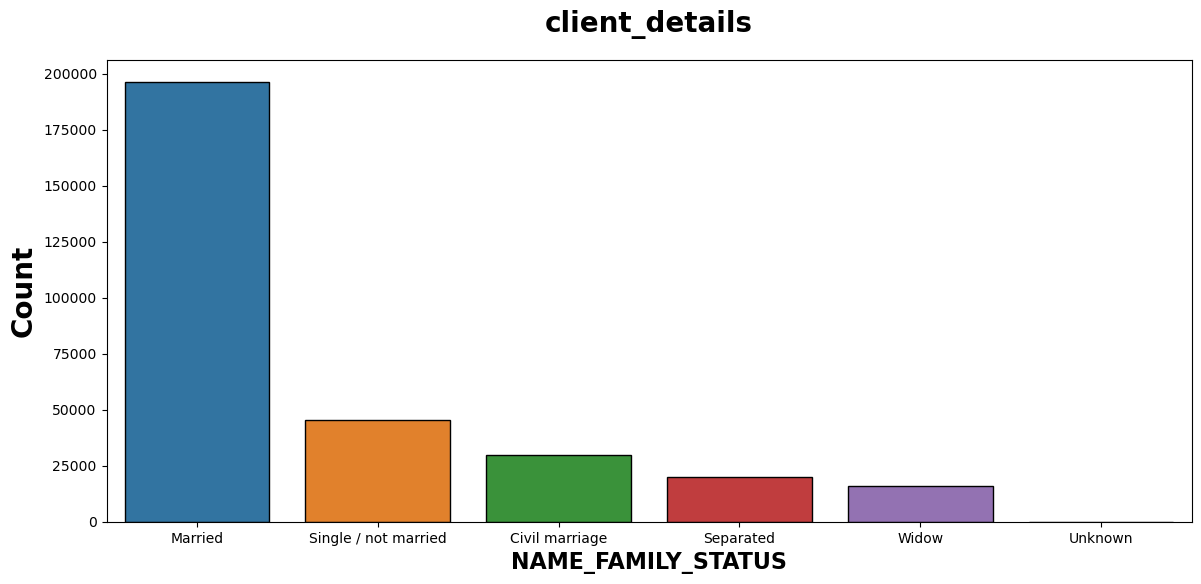

In [52]:
plt.figure(figsize=(14, 6))
sns.countplot(x="NAME_FAMILY_STATUS", data=loan_df1, ec="black",order = loan_df1['NAME_FAMILY_STATUS'].value_counts().index)
plt.title("client_details", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("NAME_FAMILY_STATUS", weight="bold", fontsize=16)
plt.show()

<Figure size 1400x600 with 0 Axes>

<Axes: xlabel='NAME_HOUSING_TYPE', ylabel='count'>

Text(0.5, 1.0, 'client_house_type_details')

Text(0, 0.5, 'Count')

Text(0.5, 0, 'NAME_HOUSING_TYPE')

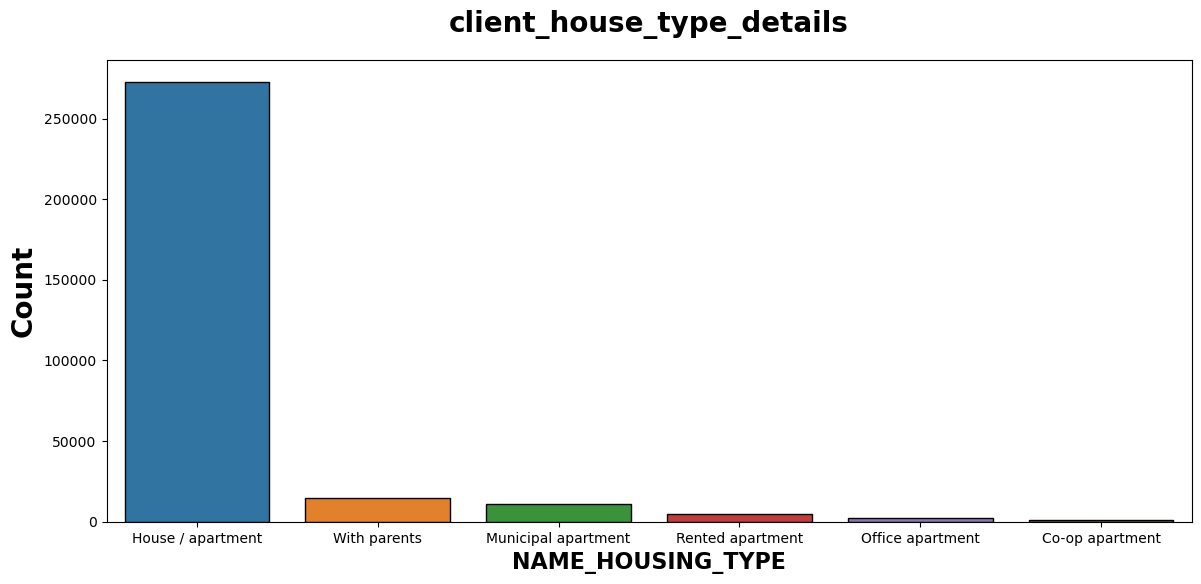

In [53]:
plt.figure(figsize=(14, 6))
sns.countplot(x="NAME_HOUSING_TYPE", data=loan_df1, ec="black",order = loan_df1['NAME_HOUSING_TYPE'].value_counts().index)
plt.title("client_house_type_details", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("NAME_HOUSING_TYPE", weight="bold", fontsize=16)
plt.show()

<Figure size 2000x1000 with 0 Axes>

<Axes: xlabel='OCCUPATION_TYPE', ylabel='count'>

Text(0.5, 1.0, 'client_occupation_type_details')

Text(0, 0.5, 'Count')

Text(0.5, 0, 'OCCUPATION_TYPE')

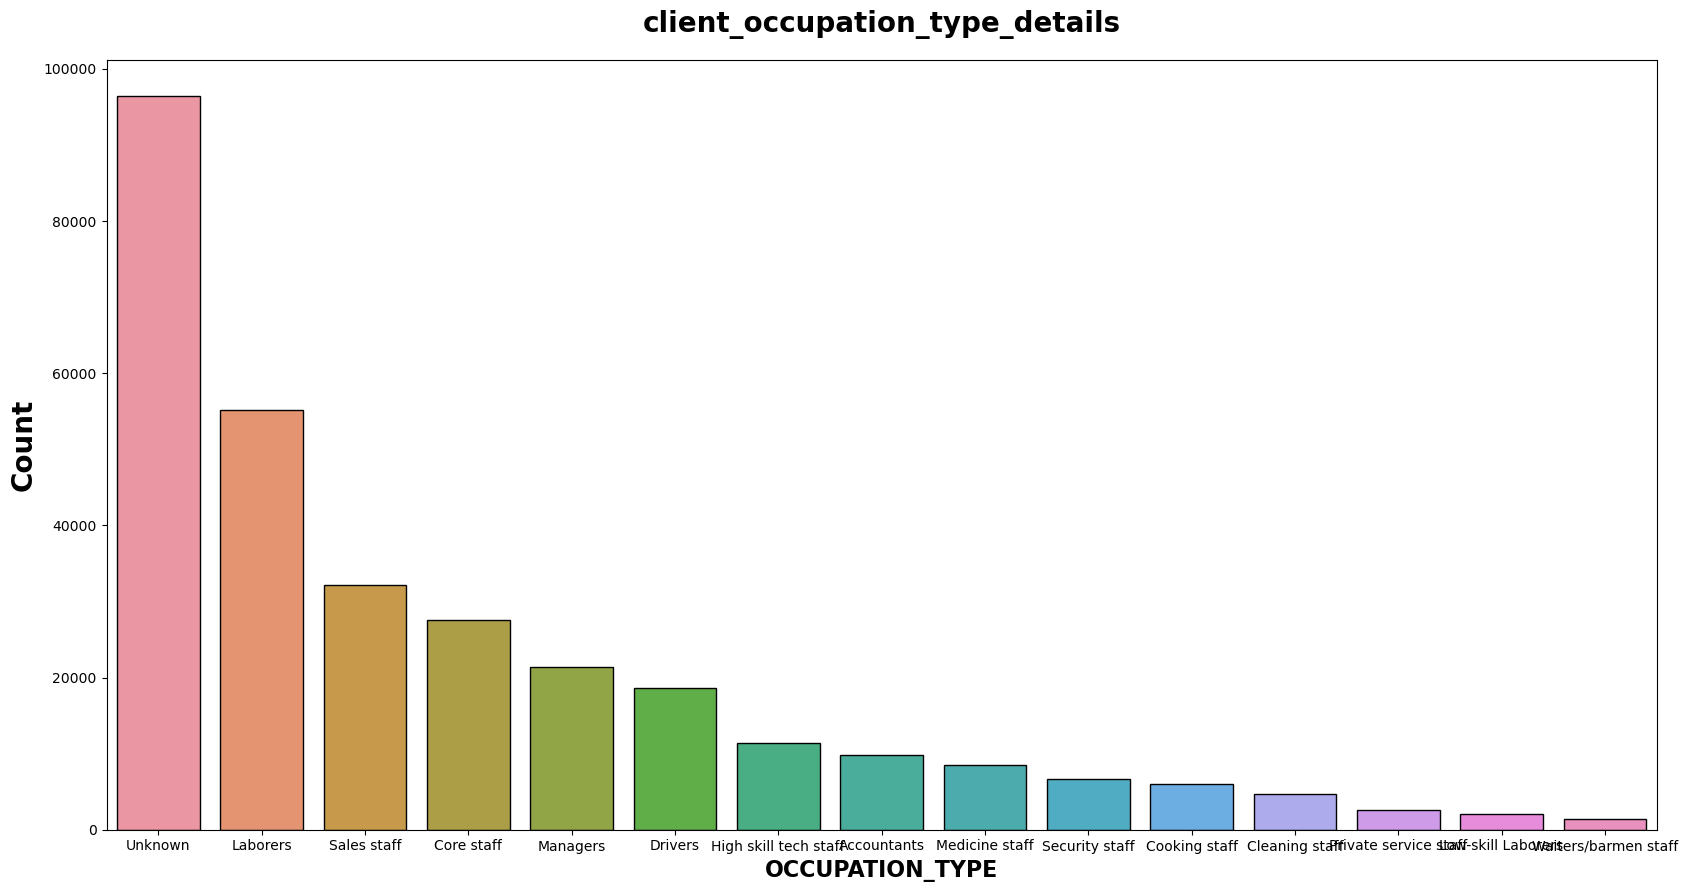

In [54]:
plt.figure(figsize=(20, 10))
sns.countplot(x="OCCUPATION_TYPE", data=loan_df1, ec="black",order = loan_df1['OCCUPATION_TYPE'].value_counts().index[:15])
plt.title("client_occupation_type_details", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("OCCUPATION_TYPE", weight="bold", fontsize=16)
plt.show()

<Figure size 2000x1000 with 0 Axes>

<Axes: xlabel='ORGANIZATION_TYPE', ylabel='count'>

Text(0.5, 1.0, 'Client_Organizatiom_type_details')

Text(0, 0.5, 'Count')

Text(0.5, 0, 'ORGANIZATION_TYPE')

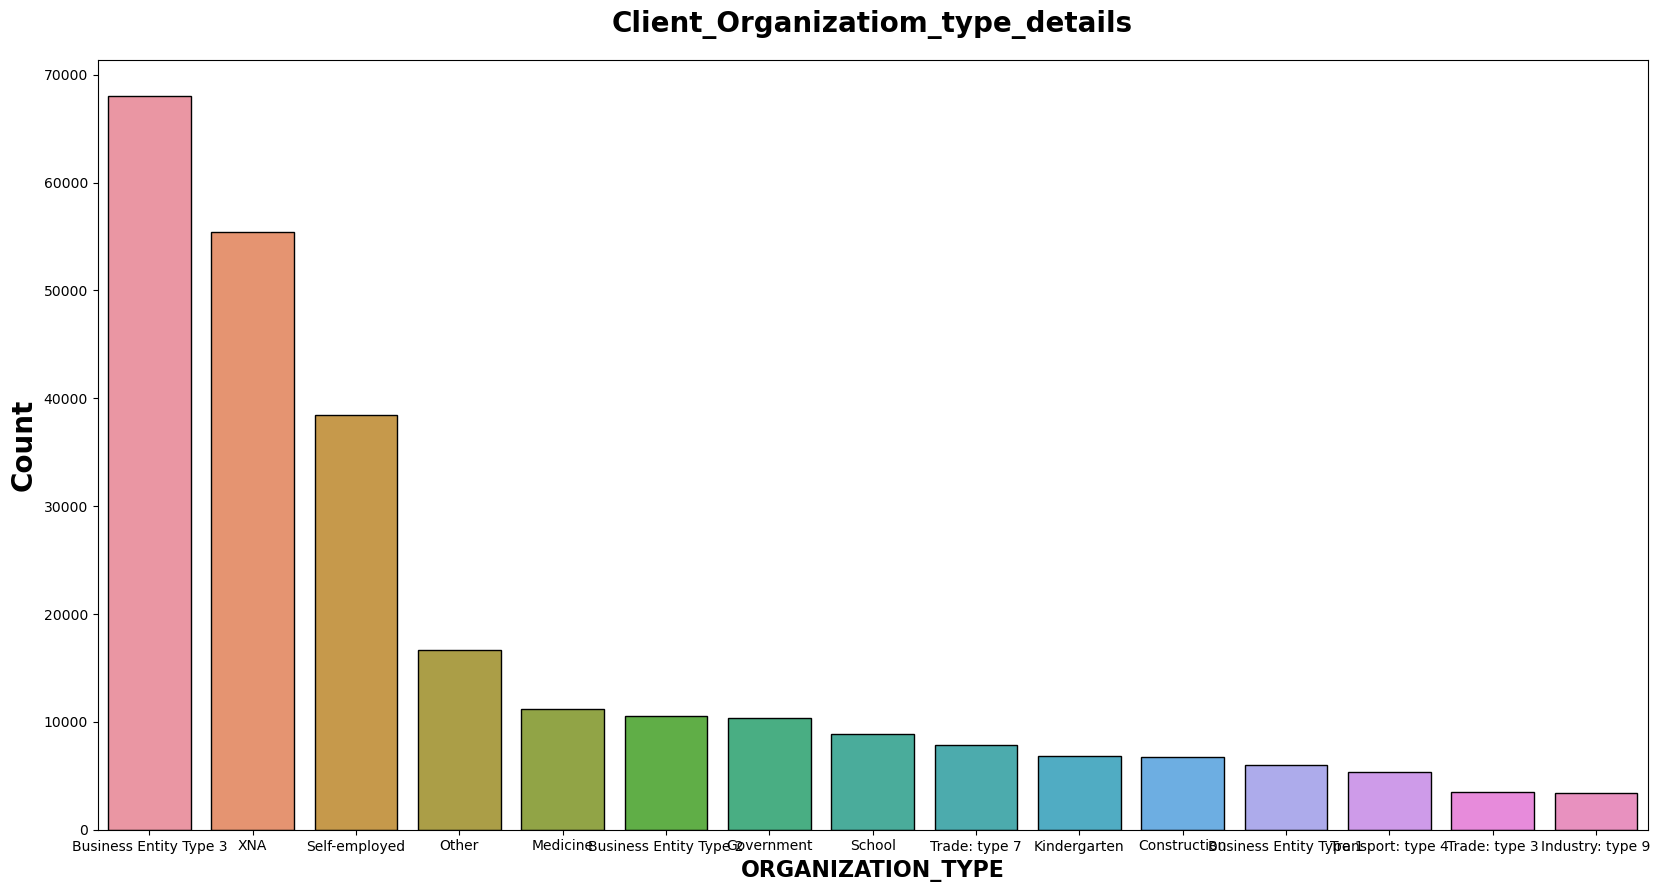

In [55]:
plt.figure(figsize=(20, 10))
sns.countplot(x="ORGANIZATION_TYPE", data=loan_df1,ec="black",order = loan_df1['ORGANIZATION_TYPE'].value_counts().index[:15])
plt.title("Client_Organizatiom_type_details", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("ORGANIZATION_TYPE", weight="bold", fontsize=16)
plt.show()

# 2.bivariate analysis:

(<Figure size 1400x700 with 1 Axes>, <Axes: >)

<Axes: xlabel='ORGANIZATION_TYPE', ylabel='TARGET'>

Text(0.5, 1.0, 'Organization vs Target')

Text(0, 0.5, 'Target')

Text(0.5, 0, 'ORGANIZATION_TYPE')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Business Entity Type 3'),
  Text(1, 0, 'XNA'),
  Text(2, 0, 'Self-employed'),
  Text(3, 0, 'Other'),
  Text(4, 0, 'Medicine'),
  Text(5, 0, 'Business Entity Type 2'),
  Text(6, 0, 'Government'),
  Text(7, 0, 'School'),
  Text(8, 0, 'Trade: type 7'),
  Text(9, 0, 'Kindergarten')])

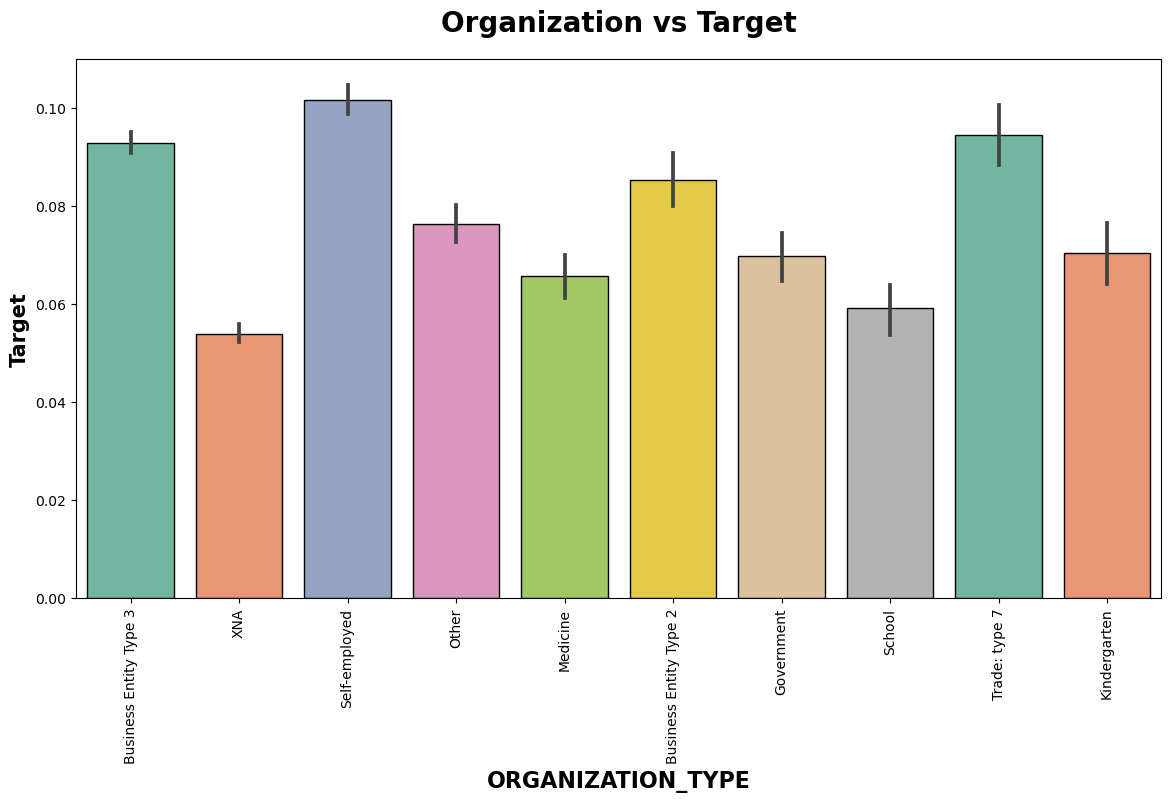

In [56]:
plt.subplots(figsize=(14,7))
sns.barplot(x='ORGANIZATION_TYPE', y='TARGET', data = loan_df1 ,ec = "black",palette="Set2",order = loan_df1['ORGANIZATION_TYPE'].value_counts().index[:10])
plt.title("Organization vs Target", weight="bold",fontsize=20, pad=20)
plt.ylabel("Target", weight="bold", fontsize=15)
plt.xlabel("ORGANIZATION_TYPE", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()


(<Figure size 1400x700 with 1 Axes>, <Axes: >)

<Axes: xlabel='OCCUPATION_TYPE', ylabel='TARGET'>

Text(0.5, 1.0, 'Occupation vs Target')

Text(0, 0.5, 'Target')

Text(0.5, 0, 'Occupation_TYPE')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Unknown'),
  Text(1, 0, 'Laborers'),
  Text(2, 0, 'Sales staff'),
  Text(3, 0, 'Core staff'),
  Text(4, 0, 'Managers'),
  Text(5, 0, 'Drivers'),
  Text(6, 0, 'High skill tech staff'),
  Text(7, 0, 'Accountants'),
  Text(8, 0, 'Medicine staff'),
  Text(9, 0, 'Security staff')])

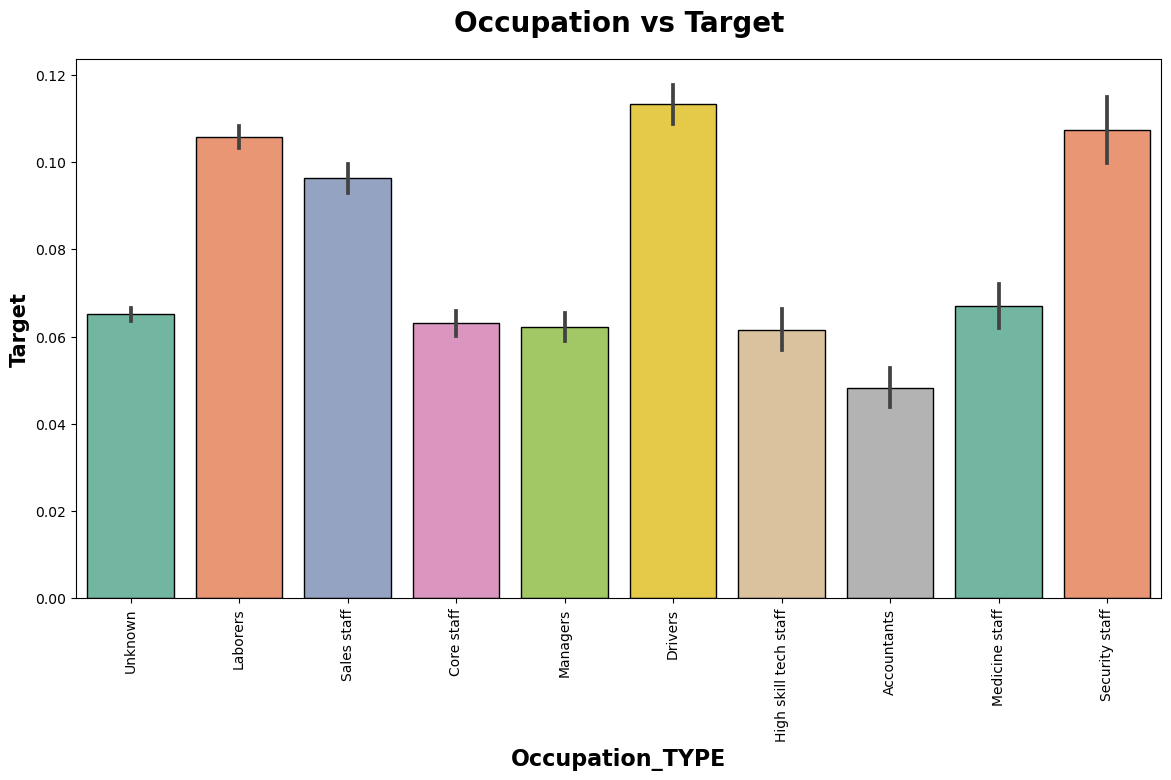

In [57]:
plt.subplots(figsize=(14,7))
sns.barplot(x='OCCUPATION_TYPE', y='TARGET',data = loan_df1 ,ec = "black",palette="Set2",order = loan_df1['OCCUPATION_TYPE'].value_counts().index[:10])
plt.title("Occupation vs Target", weight="bold",fontsize=20, pad=20)
plt.ylabel("Target", weight="bold", fontsize=15)
plt.xlabel("Occupation_TYPE", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()


(<Figure size 1400x700 with 1 Axes>, <Axes: >)

<Axes: xlabel='NAME_HOUSING_TYPE', ylabel='TARGET'>

Text(0.5, 1.0, 'House_type vs Target')

Text(0, 0.5, 'Target')

Text(0.5, 0, 'Occupation_TYPE')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'House / apartment'),
  Text(1, 0, 'With parents'),
  Text(2, 0, 'Municipal apartment'),
  Text(3, 0, 'Rented apartment'),
  Text(4, 0, 'Office apartment'),
  Text(5, 0, 'Co-op apartment')])

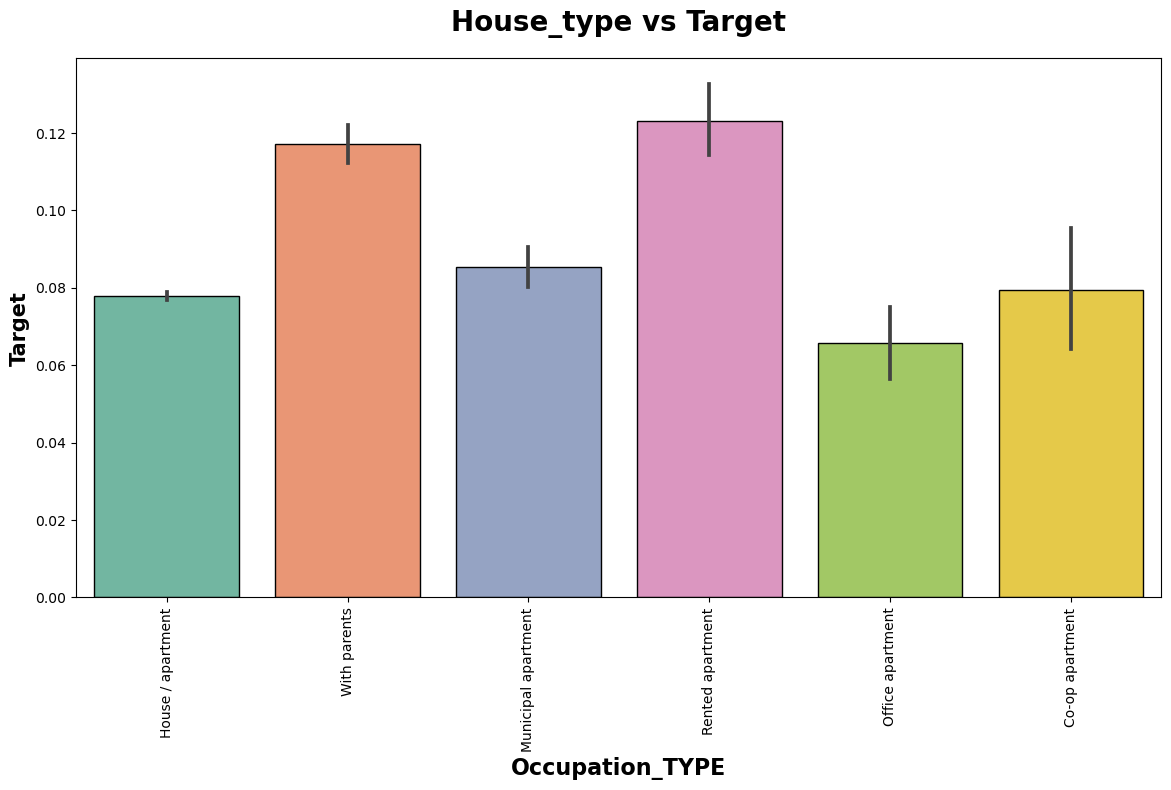

In [58]:
plt.subplots(figsize=(14,7))
sns.barplot(x='NAME_HOUSING_TYPE', y='TARGET',data = loan_df1 ,ec = "black",palette="Set2",order = loan_df1['NAME_HOUSING_TYPE'].value_counts().index[:10])
plt.title("House_type vs Target", weight="bold",fontsize=20, pad=20)
plt.ylabel("Target", weight="bold", fontsize=15)
plt.xlabel("Occupation_TYPE", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()


(<Figure size 1400x700 with 1 Axes>, <Axes: >)

<Axes: xlabel='NAME_FAMILY_STATUS', ylabel='TARGET'>

Text(0.5, 1.0, 'Family vs Target')

Text(0, 0.5, 'Target')

Text(0.5, 0, 'Family_type')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Married'),
  Text(1, 0, 'Single / not married'),
  Text(2, 0, 'Civil marriage'),
  Text(3, 0, 'Separated'),
  Text(4, 0, 'Widow'),
  Text(5, 0, 'Unknown')])

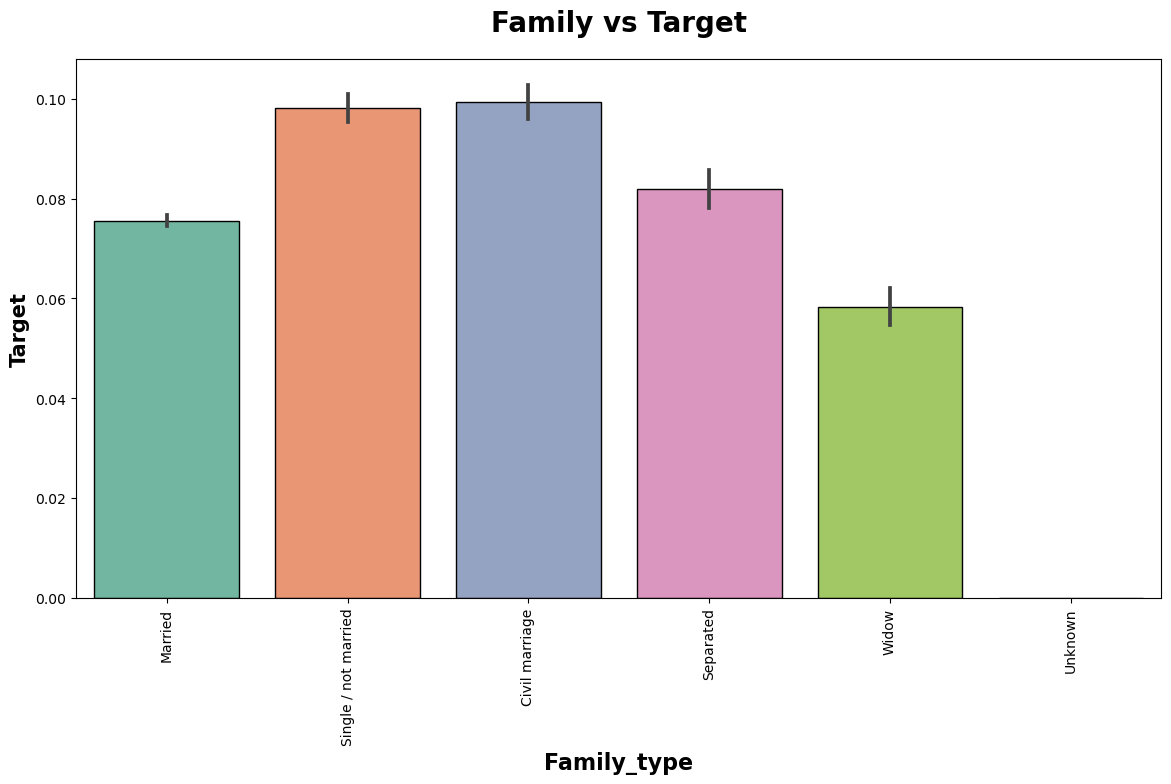

In [59]:
plt.subplots(figsize=(14,7))
sns.barplot(x='NAME_FAMILY_STATUS', y='TARGET',data = loan_df1 ,ec = "black",palette="Set2",order = loan_df1['NAME_FAMILY_STATUS'].value_counts().index[:10])
plt.title("Family vs Target", weight="bold",fontsize=20, pad=20)
plt.ylabel("Target", weight="bold", fontsize=15)
plt.xlabel("Family_type", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()

(<Figure size 1400x700 with 1 Axes>, <Axes: >)

<Axes: xlabel='NAME_EDUCATION_TYPE', ylabel='TARGET'>

Text(0.5, 1.0, 'Education vs Target')

Text(0, 0.5, 'Target')

Text(0.5, 0, 'Education_type')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Secondary / secondary special'),
  Text(1, 0, 'Higher education'),
  Text(2, 0, 'Incomplete higher'),
  Text(3, 0, 'Lower secondary'),
  Text(4, 0, 'Academic degree')])

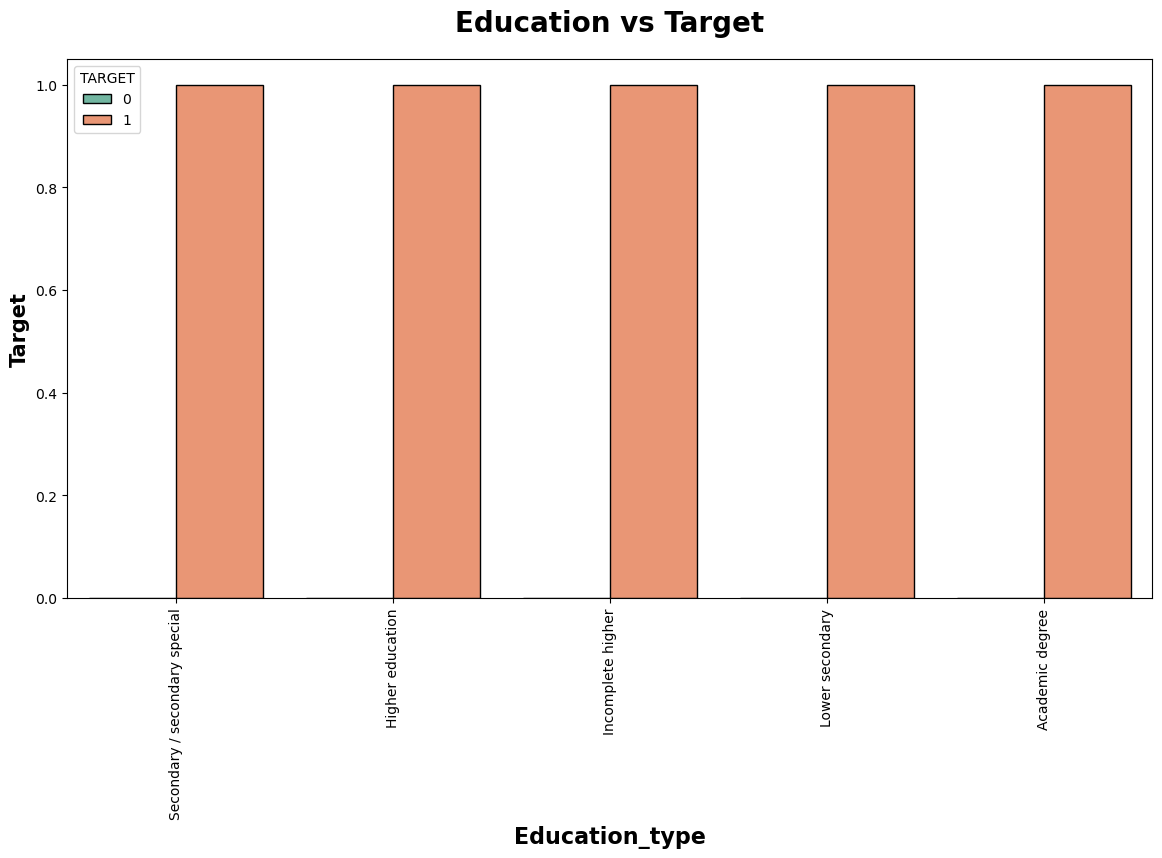

In [60]:
plt.subplots(figsize=(14,7))
sns.barplot(x='NAME_EDUCATION_TYPE', y='TARGET',data = loan_df1 ,hue ='TARGET',ec = "black",palette="Set2")
plt.title("Education vs Target", weight="bold",fontsize=20, pad=20)
plt.ylabel("Target", weight="bold", fontsize=15)
plt.xlabel("Education_type", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()

(<Figure size 1400x700 with 1 Axes>, <Axes: >)

<Axes: xlabel='NAME_INCOME_TYPE', ylabel='TARGET'>

Text(0.5, 1.0, 'Incomevs Target')

Text(0, 0.5, 'Target')

Text(0.5, 0, 'Income_type')

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Working'),
  Text(1, 0, 'State servant'),
  Text(2, 0, 'Commercial associate'),
  Text(3, 0, 'Pensioner'),
  Text(4, 0, 'Unemployed'),
  Text(5, 0, 'Student'),
  Text(6, 0, 'Businessman'),
  Text(7, 0, 'Maternity leave')])

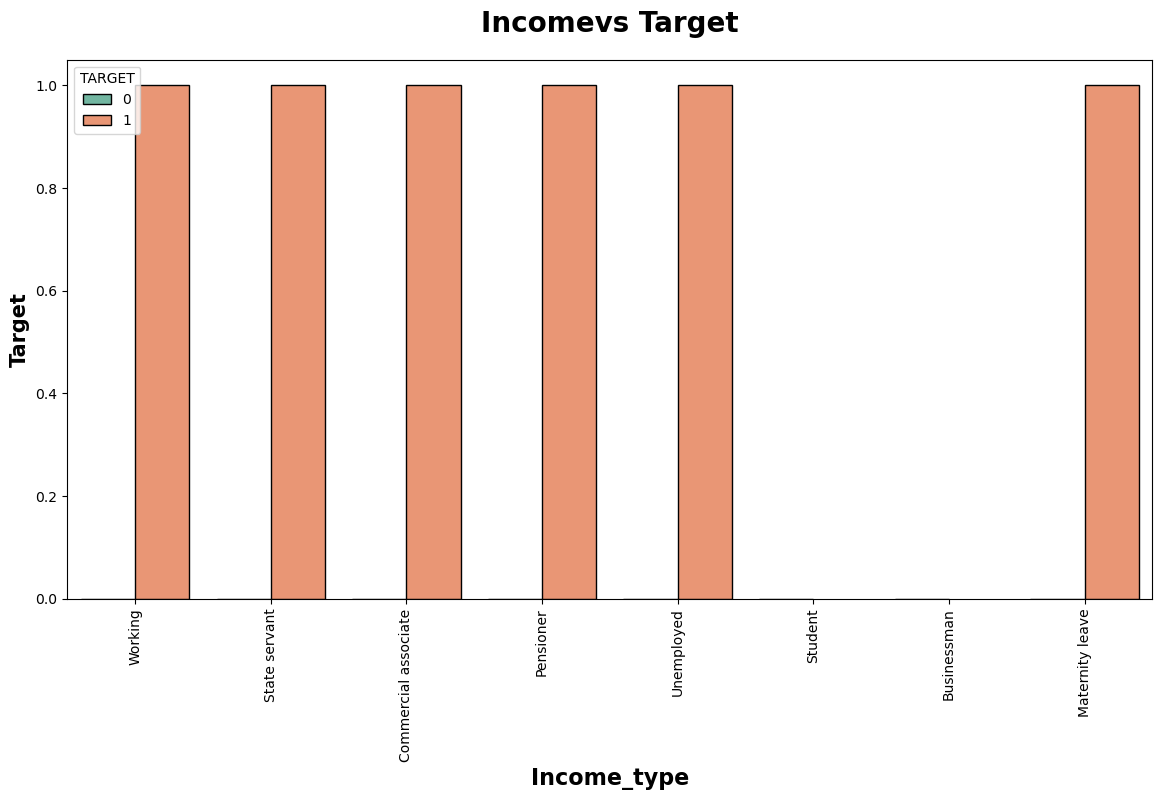

In [61]:
plt.subplots(figsize=(14,7))
sns.barplot(x='NAME_INCOME_TYPE', y='TARGET',data = loan_df1 ,hue ='TARGET',ec = "black",palette="Set2")
plt.title("Incomevs Target", weight="bold",fontsize=20, pad=20)
plt.ylabel("Target", weight="bold", fontsize=15)
plt.xlabel("Income_type", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()

(<Figure size 1400x700 with 1 Axes>, <Axes: >)

<Axes: xlabel='FLAG_OWN_REALTY', ylabel='TARGET'>

Text(0.5, 1.0, 'Clinet_Own-Property vs Target')

Text(0, 0.5, 'Target')

Text(0.5, 0, 'Clinet_property')

(array([0, 1]), [Text(0, 0, 'Y'), Text(1, 0, 'N')])

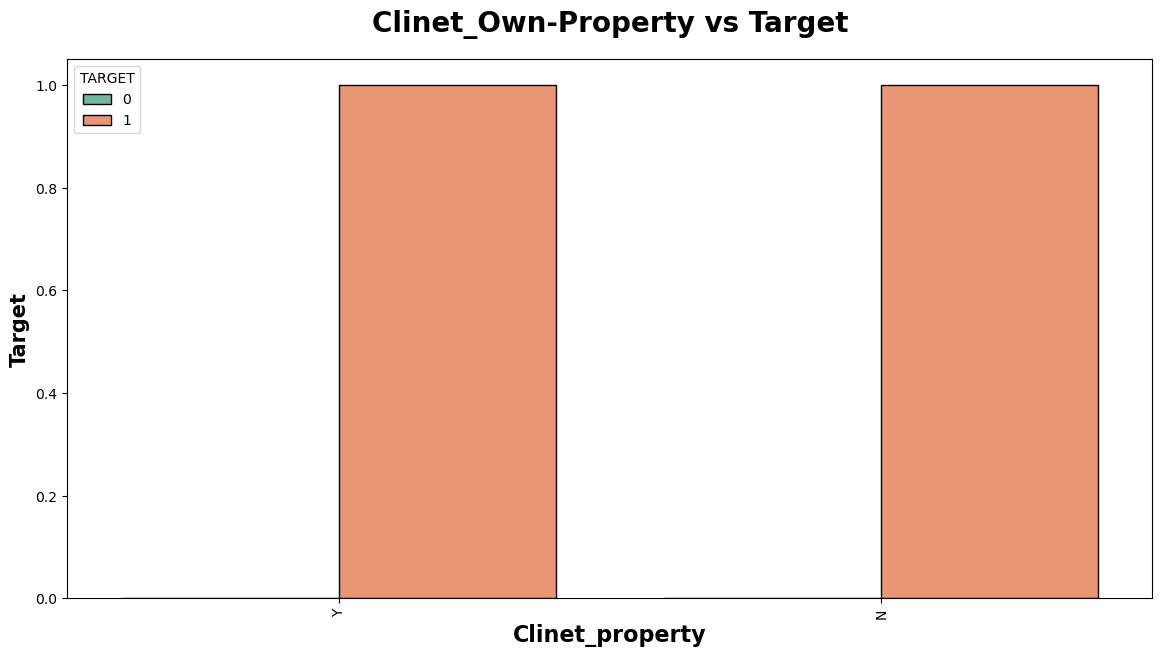

In [62]:
plt.subplots(figsize=(14,7))
sns.barplot(x='FLAG_OWN_REALTY', y='TARGET',data = loan_df1 ,hue ='TARGET' , ec = "black",palette="Set2")
plt.title("Clinet_Own-Property vs Target", weight="bold",fontsize=20, pad=20)
plt.ylabel("Target", weight="bold", fontsize=15)
plt.xlabel("Clinet_property", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()

In [63]:
loan_df1.isnull().sum()

TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
REG_REGION

In [64]:
loan_df1.shape

(307511, 64)

In [65]:
loan_df2 = loan_df1.copy()

In [115]:
from scipy.stats import chi2_contingency

# Chi-Square Statistic test difference between the two categorical variables.
# List of categorical columns
categorical_columns = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
                        'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
                        'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
                        'ORGANIZATION_TYPE']

chi2_test = []

for feature in categorical_columns:
    contingency_table = pd.crosstab(loan_df2['TARGET'], loan_df2[feature])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    
    if p < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')

test_result = pd.DataFrame(data=[categorical_columns, chi2_test]).T
test_result.columns = ['Categorical Features', 'Hypothesis Result']

test_result


KeyError: 'NAME_CONTRACT_TYPE'

# Feature Encoding:

In [67]:
#loan_df2['NAME_EDUCATION_TYPE'].value_counts()

In [68]:
# NAME_EDUCATION_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_FAMILY_STATUS,NAME_TYPE_SUITE,NAME_HOUSING_TYPE,NAME_INCOME_TYPE  catgrical feature convert to numerical features use the mapping method:

In [69]:

# feature encoding with mapping method:

loan_df2['NAME_EDUCATION_TYPE_Numeric'] = loan_df2['NAME_EDUCATION_TYPE'].map({
    'Higher education': 1,
    'Incomplete higher': 2,
    'Academic degree': 3,
    'Secondary / secondary special': 4,
    'Lower secondary': 5
})


In [70]:
#loan_df2['CODE_GENDER'].value_counts()

In [71]:
loan_df2['CODE_GENDER_Numeric'] = loan_df2['CODE_GENDER'].map({
    'F': 0,
    'M': 1,
    'XNA': 2
})


In [72]:
#loan_df2['FLAG_OWN_CAR'].value_counts()

In [73]:
loan_df2['FLAG_OWN_CAR_Numeric'] = loan_df2['FLAG_OWN_CAR'].map({
    'Y': 0,
    'N': 1
})


In [74]:
#loan_df2['FLAG_OWN_REALTY'].value_counts()

In [75]:
loan_df2['FLAG_OWN_REALTY_Numeric'] = loan_df2['FLAG_OWN_REALTY'].map({
    'Y': 0,
    'N': 1
})

In [76]:
#loan_df2['NAME_FAMILY_STATUS'].value_counts()

In [77]:
loan_df2['NAME_FAMILY_STATUS_Numeric'] = loan_df2['NAME_FAMILY_STATUS'].map({
    'Married': 0,
    'Single / not married': 1,
    'Civil marriage': 2,
    'Separated': 3,
    'Widow': 4,
    'Unknown': 5
})

In [78]:
# loan_df2['NAME_CONTRACT_TYPE'].value_counts()

In [79]:
loan_df2['NAME_CONTRACT_TYPE_Numeric'] = loan_df2['NAME_CONTRACT_TYPE'].map({
    'Cash loans': 0,
    'Revolving loans': 1
})

In [80]:
#loan_df2['NAME_TYPE_SUITE'].value_counts()

In [81]:
loan_df2['NAME_TYPE_SUITE_Numeric'] = loan_df2['NAME_TYPE_SUITE'].map({
    
    'Unaccompanied'  :0,  
    'Family'    :1,          
    'Spouse, partner':2,   
    'Children':3,            
    'Other_B':4,            
    'Other_A' :5,             
    'Group of people' :6    
})

In [82]:
#loan_df2['NAME_HOUSING_TYPE'].value_counts()

In [83]:
loan_df2['NAME_HOUSING_TYPE_Numeric'] = loan_df2['NAME_HOUSING_TYPE'].map({
    'House / apartment': 0,
    'With parents': 1,
    'Municipal apartment': 2,
    'Rented apartment': 3,
    'Office apartment': 4,
    'Co-op apartment': 5
})


In [84]:
#loan_df2['NAME_INCOME_TYPE'].value_counts()

In [85]:
loan_df2['NAME_INCOME_TYPE_Numeric'] = loan_df2['NAME_INCOME_TYPE'].map({
    'Working': 0,
    'Commercial associate': 1,
    'Pensioner': 2,
    'State servant': 3,
    'Unemployed': 4,
    'Student': 5,
    'Businessman': 6,
    'Maternity leave': 7
})

In [86]:
loan_df2['OCCUPATION_TYPE'].value_counts()

OCCUPATION_TYPE
Unknown                  96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

In [87]:
loan_df2['ORGANIZATION_TYPE'].value_counts()

ORGANIZATION_TYPE
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7      

In [88]:

# Fit and transform 'OCCUPATION_TYPE'
label_encoder = LabelEncoder()
loan_df2['OCCUPATION_TYPE'] = label_encoder.fit_transform(loan_df2['OCCUPATION_TYPE'])

# Fit and transform 'ORGANIZATION_TYPE'
loan_df2['ORGANIZATION_TYPE'] = label_encoder.fit_transform(loan_df2['ORGANIZATION_TYPE'])


In [89]:
loan_df2

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,NAME_EDUCATION_TYPE_Numeric,CODE_GENDER_Numeric,FLAG_OWN_CAR_Numeric,FLAG_OWN_REALTY_Numeric,NAME_FAMILY_STATUS_Numeric,NAME_CONTRACT_TYPE_Numeric,NAME_TYPE_SUITE_Numeric,NAME_HOUSING_TYPE_Numeric,NAME_INCOME_TYPE_Numeric
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,27108.573909,538396.207429,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,8,2.152665,2,2,0,0,0,0,0,0,5,0.514393,0.510853,1.422245,0.143421,1.405292,0.100049,962.858788,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1,1,0,1,0,0,0,0
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,27108.573909,538396.207429,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,3,2.152665,1,1,0,0,0,0,0,0,39,0.514393,0.510853,1.422245,0.143421,1.405292,0.100049,962.858788,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,3
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,27108.573909,538396.207429,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,8,2.152665,2,2,0,0,0,0,0,0,11,0.514393,0.510853,1.422245,0.143421,1.405292,0.100049,962.858788,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1,0,0,1,1,0,0,0
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,27108.573909,538396.207429,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,8,2.152665,2,2,0,0,0,0,0,0,5,0.514393,0.510853,1.422245,0.143421,1.405292,0.100049,962.858788,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,1,0,2,0,0,0,0
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,27108.573909,538396.207429,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,3,2.152665,2,2,0,0,0,0,1,1,37,0.514393,0.510853,1.422245,0.143421,1.405292,0.100049,962.858788,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,Cash loans,M,N,N,0,157500.0,254700.0,27108.573909,538396.207429,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,9327,236,8456.0,1982,1,1,0,1,0,0,14,2.152665,1,1,0,0,0,0,0,0,43,0.514393,0.510853,1.422245,0.143421,1.405292,0.100049,962.858788,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1,1,1,3,0,0,1,0
307507,0,Cash loans,F,N,Y,0,72000.0,269550.0,27108.573909,538396.207429,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,20775,365243,4388.0,4090,1,0,0,1,1,0,17,2.152665,2,2,0,0,0,0,0,0,57,0.514393,0.510853,1.422245,0.143421,1.4

In [90]:
# dropping the duplicates features
loan_df2.drop(['CODE_GENDER','NAME_CONTRACT_TYPE','FLAG_OWN_CAR','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_TYPE_SUITE','NAME_HOUSING_TYPE'],axis = 1,inplace = True)

In [91]:

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Principal Component Analysis, is a dimensionality reduction technique commonly used in machine learning and data analysis.

loan_df_pca = loan_df2[['TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS','OCCUPATION_TYPE' ,'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3','ORGANIZATION_TYPE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
       'NAME_EDUCATION_TYPE_Numeric', 'CODE_GENDER_Numeric',
       'NAME_CONTRACT_TYPE_Numeric', 'FLAG_OWN_CAR_Numeric',
       'NAME_TYPE_SUITE_Numeric', 'NAME_HOUSING_TYPE_Numeric',
       'NAME_INCOME_TYPE_Numeric']]

# Standardize the data (important for PCA)
scaler = StandardScaler()
scaled_loan_features = scaler.fit_transform(loan_df_pca.iloc[:, 1:])  # Exclude 'TARGET' column from scaling

# Choose the number of principal components
n_components = 20 

# Apply PCA
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(scaled_loan_features)

# Create a DataFrame with the principal components
columns = [f'PC{i + 1}' for i in range(n_components)]
pca_df = pd.DataFrame(data=pca_result, columns=columns)

# Concatenate the principal components with the 'TARGET' column
final_loan_df_pca_data = pd.concat([loan_df_pca[['TARGET']], pca_df], axis=1)




In [92]:
final_loan_df_pca_data['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

In [93]:
# in TARGET feature, the '0' and '1' value difference is very high. So we need to oversampling to reduce the imbalance .

In [94]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [105]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV
import pickle

In [96]:
from imblearn.combine import SMOTETomek

X = final_loan_df_pca_data.drop(['TARGET'], axis=1)
y = final_loan_df_pca_data['TARGET']

# Apply SMOTETomek to the data
smote_tomek = SMOTETomek(sampling_strategy='auto', random_state=42)
X_new, y_new = smote_tomek.fit_resample(X, y)

In [97]:

X.shape, y.shape, X_new.shape, y_new.shape

((307511, 20), (307511,), (562916, 20), (562916,))

In [98]:
X = final_loan_df_pca_data.drop(['TARGET'],axis = 1)
y = final_loan_df_pca_data['TARGET']

# Assuming you have your features X and target variable y
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new , test_size=0.2, random_state=42)

# Create and fit a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print(f"Accuracy on the training set: {accuracy_train:.4f}")
print(f"Accuracy on the testing set: {accuracy_test:.4f}")

LogisticRegression()

Accuracy on the training set: 0.6027
Accuracy on the testing set: 0.6025


In [99]:
X = final_loan_df_pca_data.drop(['TARGET'],axis = 1)
y = final_loan_df_pca_data['TARGET']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new , test_size=0.2, random_state=42)


model = XGBClassifier(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print("R-squared (R2) Score - Training Set:", accuracy_train)
print("R-squared (R2) Score - Testing Set:", accuracy_test)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='reg:squarederror', ...)

R-squared (R2) Score - Training Set: 0.6747866018848316
R-squared (R2) Score - Testing Set: 0.662660768848149


In [100]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

xgb_class = XGBClassifier(objective='reg:squarederror', random_state=42)

grid_search = GridSearchCV(estimator=xgb_class, param_grid=param_grid, scoring='r2', cv=3)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

# Make predictions with the best model
best_model = grid_search.best_estimator_
y_test_pred_best = best_model.predict(X_test)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     objective='reg:squarederror', ...),
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 150]},
             scoring='r2')

Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 150}


In [102]:

# Assuming you have X_train, X_test, y_train, and y_test defined

# Create and train the final XGBoost model with the best hyperparameters
XGB_final_model = XGBClassifier(objective='reg:squarederror',
                               n_estimators=150,
                               learning_rate=0.2,
                               max_depth=7,
                               random_state=42)

XGB_final_model.fit(X_train, y_train)

# Make predictions on training and testing sets
y_train_pred = XGB_final_model.predict(X_train)
y_test_pred = XGB_final_model.predict(X_test)

# confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_true=y_test, y_pred=y_test_pred))

print("\nClassification Report:")
print(classification_report(y_true=y_test, y_pred=y_test_pred))


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, objective='reg:squarederror', ...)

Confusion Matrix:
[[38979 17081]
 [12745 43779]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.70      0.72     56060
           1       0.72      0.77      0.75     56524

    accuracy                           0.74    112584
   macro avg       0.74      0.73      0.73    112584
weighted avg       0.74      0.74      0.73    112584



<Figure size 800x800 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver Operating Characteristic (ROC) Curve')

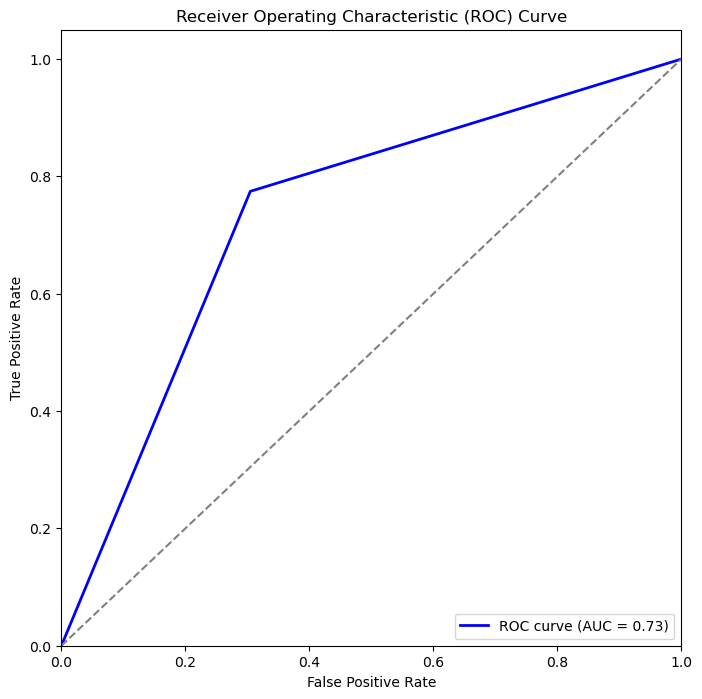

Area Under the Curve (AUC): 0.7349145777850107


In [108]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


# Calculate ROC curve
FP, TP, threshold = roc_curve(y_true=y_test, y_score=y_test_pred)

# Calculate AUC
auc_curve = auc(x=FP, y=TP)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(FP, TP, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_curve)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print AUC
print("Area Under the Curve (AUC):", auc_curve)


In [113]:
#save the classification model by using pickle

import pickle

with open("C:\\Users\\User\\OneDrive\\Desktop\\Loan_frad\\Loan_Fradud_Deduction.pkl", 'wb') as f:
    pickle.dump(model, f)
